# Overview
Use Case 1 Classification Algorihtm

1. Import Library dan Import Dataset
2. Missing Value Detection & Mising Value Handling
   - Null Value
   - Duplicate Value
   - Karakter yg tidak diinginkan
3. Descriptive Statistics (Features, Value, Type, and Statistic)
4. Anomaly Detection, Outlier & Outlier handling
5. EDA (Exploratory Data Analysis) & Distribution Data (Visualization)
    - Histogram
    - Correlation Matrix
    - Plot (Pair plot, Bar plot, Candle plot)
6. Transformasi data
    - One Hot Encoder (Ada Dummy (coba cari tahu))
    - Label Encoder
    - Mapping value (Categorical/Numeric)
7. Feature/Variable Selection & Dimensional Reduction
    - Correlation Matrix
    - PCA (Principle Componen Analysis)
    - Feature/Variabel Importance with Model Algorithm
    - Manual Selection    
8. Normalisasi/Standarisasi:
    - Min Max Scaler
    - Standard Scalar
9. Spliting dataset train & test & parameter understanding
    - 80:20
    - 70:30
    - 90:10
10. Memerika Imbalance data target & Handling imbalance
    - Undersample       
    - SMOTE
11. Modeling Machine Learning (Classification)
      - NB (Naïve Bayes Classifier)
      - k-NN (k-Nearest Neighbor)
      - DT (Decision Tree)
12. Pengukuran/Evaluasi Terhadap Model: Confusion Matrix
    - Accuracy                     
    - Precision                    
    - Recall         
    - F1-Score       
    - FPR
    - TPR
    - Sensitivity
    - G-Score
    - Visualization result
13. Hyperparameter Tuning
      - Manual Searching
      - Grid Search
      - Random Search
14. Validasi Model
      - Repeated hold-out (r=100)
      - k-Fold Cross Validation (k=0)
15. Prediction News dataset (Out of Sample)
      - Visualization result
      - Analisis result
16. Pengukuran/Evaluasi Bisnis: Business Approach
    Mencocokkan hasil prediksi terhadap actual pola    
    perilaku nasabah yang di approve

#1. Import Library dan Import Dataset

In [ ]:
#Import Library Pendukung Praproses data & Analisis Data
import pandas as pd #data preparation
import numpy as np #data numerical operations & calculation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
from collections import Counter #nge cek imbalance data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #transformasi data
from sklearn.preprocessing import MinMaxScaler #menskalakan dataset, standarisasi, normalisasi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #memecah data yg akam di training algoritma dengan data yg untuk testing
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

#Library algoritma untuk membangun model prediksi
from sklearn.neighbors import KNeighborsClassifier #k-NN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #DT, RF (Random Forest), ERT (Extreme Randomized Trees), XGB (Extreme Gradient Boosting), LGBM (Light Gradient Boosting Machines)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, classification_report #evaluasi performa model (data, preparation, algoritma)
from sklearn.model_selection import GridSearchCV

In [ ]:
#Koneksi google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#target Approve = data nasabah yg masuk dalam kriteria selalu tepat waktu membayar kredit atau di approve
#target Reject = data nasabah yg masuk dalam kriteria 50% dari tenor selalu terlambat atau pengajuan sebelumnya di reject oleh manager
data_nasabah = pd.read_csv('drive/MyDrive/training/data_nasabah.csv')
data_nasabah.head()

,ID_NPK,Nama_Nasabah,Nomor_Telepon,Usia,Alamat,Kelurahan_Desa,Kecamatan,Kab_Kota,Pekerjaan,Posisi_Perusahaan,...,Penghasilan_Nasabah,Penghasilan_Pasangan,Pengeluaran,Nama_Pasangan_Penjamin,Usia_Pasangan_Penjamin,Telp_Pasangan_Penjamin,Hubungan,Status_Rumah,Verifikasi,Status
0,1,A Aso Mannurungi,8.235897e+10,49,Handil Baru Darat Rt 010,Handil Baru Darat,Samboja,Kutai Kartanegara,Jasa,Pemborong Bangunan,...,9700000,1900000,6960000,Indriyani Widiastuti,25,85245851148,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve
1,2,A Darmawansyah,8.212666e+10,39,Jl A Yani Rt 013,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Pt Sucofindo,...,5300000,1700000,4200000,Muhammad Sahidi,20,82255578880,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve
2,3,A Fitriani H M N,8.135078e+10,70,Jl Pelita Gang 45 Rt 004,Dondang,Muara Jawa,Kutai Kartanegara,Pedagang,Warung Sembako,...,6500000,2500000,5400000,Istiqomah,29,81253429418,Saudara,Milik Sendiri Sudah Lunas,Survey,Approve
3,4,A Rini Retno Wijayati,8.235367e+10,60,Jl Telindung Iii No 1 06 00,Muara Rapak,Balikpapan Utara,Balikpapan,Karyawan Bank,Staff,...,6000000,1900000,4740000,Dhenhas Al Barqy Zukhruf L,30,NaN,Saudara,Milik Sendiri Sudah Lunas,Survey,Approve
4,5,Abd Kadir,8.575325e+10,54,Jl Paus No 267 25 00,Manggar Baru,Balikpapan Timur,Balikpapan,Karyawan Swasta Non Bank,Staff,...,5300000,2100000,4440000,Feri Kurniawan,26,81347423779,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve


In [ ]:
#menambahkan kolom baru sisa penghasilan
data_nasabah['Sisa_Penghasilan'] = (data_nasabah['Penghasilan_Nasabah']-data_nasabah['Pengeluaran'])
data_nasabah.head()

,ID_NPK,Nama_Nasabah,Nomor_Telepon,Usia,Alamat,Kelurahan_Desa,Kecamatan,Kab_Kota,Pekerjaan,Posisi_Perusahaan,...,Penghasilan_Pasangan,Pengeluaran,Nama_Pasangan_Penjamin,Usia_Pasangan_Penjamin,Telp_Pasangan_Penjamin,Hubungan,Status_Rumah,Verifikasi,Status,Sisa_Penghasilan
0,1,A Aso Mannurungi,8.235897e+10,49,Handil Baru Darat Rt 010,Handil Baru Darat,Samboja,Kutai Kartanegara,Jasa,Pemborong Bangunan,...,1900000,6960000,Indriyani Widiastuti,25,85245851148,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve,2740000
1,2,A Darmawansyah,8.212666e+10,39,Jl A Yani Rt 013,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Pt Sucofindo,...,1700000,4200000,Muhammad Sahidi,20,82255578880,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve,1100000
2,3,A Fitriani H M N,8.135078e+10,70,Jl Pelita Gang 45 Rt 004,Dondang,Muara Jawa,Kutai Kartanegara,Pedagang,Warung Sembako,...,2500000,5400000,Istiqomah,29,81253429418,Saudara,Milik Sendiri Sudah Lunas,Survey,Approve,1100000
3,4,A Rini Retno Wijayati,8.235367e+10,60,Jl Telindung Iii No 1 06 00,Muara Rapak,Balikpapan Utara,Balikpapan,Karyawan Bank,Staff,...,1900000,4740000,Dhenhas Al Barqy Zukhruf L,30,NaN,Saudara,Milik Sendiri Sudah Lunas,Survey,Approve,1260000
4,5,Abd Kadir,8.575325e+10,54,Jl Paus No 267 25 00,Manggar Baru,Balikpapan Timur,Balikpapan,Karyawan Swasta Non Bank,Staff,...,2100000,4440000,Feri Kurniawan,26,81347423779,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve,860000


In [ ]:
#Melihat jenis data, jumlah kolom, dan nilai null
data_nasabah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_NPK                      1636 non-null   int64  
 1   Nama_Nasabah                1636 non-null   object 
 2   Nomor_Telepon               1636 non-null   float64
 3   Usia                        1636 non-null   int64  
 4   Alamat                      1632 non-null   object 
 5   Kelurahan_Desa              1633 non-null   object 
 6   Kecamatan                   1636 non-null   object 
 7   Kab_Kota                    1636 non-null   object 
 8   Pekerjaan                   1633 non-null   object 
 9   Posisi_Perusahaan           1636 non-null   object 
 10  Perusahaan_Pemilik_Bekerja  499 non-null    object 
 11  Lama_Kerja_Bisnis           1636 non-null   int64  
 12  Telp_Perusahaan             1636 non-null   object 
 13  Penghasilan_Nasabah         1636 

#2. Missing Value Detection & Mising Value Handling

##Null value, dapat di tangani dengan bberapa solusi :
- Replacement
- Delete Row
- Change with Mean/Average
- Don't Selection in Variable selection

In [ ]:
data_nasabah.isnull().sum()

,0
ID_NPK,0
Nama_Nasabah,0
Nomor_Telepon,0
Usia,0
Alamat,4
Kelurahan_Desa,3
Kecamatan,0
Kab_Kota,0
Pekerjaan,3
Posisi_Perusahaan,0


In [ ]:
#Null value handling: Delete Row
data_nasabah = data_nasabah.dropna(subset=['Alamat','Kelurahan_Desa','Pekerjaan'])

In [ ]:
data_nasabah.isnull().sum()

,0
ID_NPK,0
Nama_Nasabah,0
Nomor_Telepon,0
Usia,0
Alamat,0
Kelurahan_Desa,0
Kecamatan,0
Kab_Kota,0
Pekerjaan,0
Posisi_Perusahaan,0


In [ ]:
Perusahaan_Pemilik_Bekerja = data_nasabah['Perusahaan_Pemilik_Bekerja']
Perusahaan_Pemilik_Bekerja

,Perusahaan_Pemilik_Bekerja
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1630,PT Globalindo Inti Energi
1632,PT. Jasa Swadaya Utama
1633,PT. Matahari Putra Prima
1634,Dipekerjakan Anggota Dewan


##Duplicate Value

Dapat di tangani dengan beberapa solusi, di antaranya :
- Delete Row
- Dibiarkan saja. 1. Tidak cocon untuk seperti algoritma Naive bayer/probabilitas. 2. akan terjadi imbalance data

In [ ]:
#Seleksi duplikat baris kecuali baris pertamanya
duplicate = data_nasabah[data_nasabah.duplicated()]

print("Baris Duplikat dinataranya :")
duplicate.head(20)

Baris Duplikat dinataranya :


,ID_NPK,Nama_Nasabah,Nomor_Telepon,Usia,Alamat,Kelurahan_Desa,Kecamatan,Kab_Kota,Pekerjaan,Posisi_Perusahaan,...,Penghasilan_Pasangan,Pengeluaran,Nama_Pasangan_Penjamin,Usia_Pasangan_Penjamin,Telp_Pasangan_Penjamin,Hubungan,Status_Rumah,Verifikasi,Status,Sisa_Penghasilan
722,722,Juryansyah,8.231145e+10,19,Jl Tahir Rt 002,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Jasa,Salon Dawiah,...,2600000,3180000,Sotieli Harefa,22,82148961253,Keponakan,Milik Sendiri Belum Lunas,Survey,Reject,-480000
723,722,Juryansyah,8.231145e+10,19,Jl Tahir Rt 002,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Jasa,Salon Dawiah,...,2600000,3180000,Sotieli Harefa,22,82148961253,Keponakan,Milik Sendiri Belum Lunas,Survey,Reject,-480000
734,732,Kandu,8.215158e+10,43,Jl Mulawarman Rt 001,Salok Api Laut,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Pt Vetia Delicipta,...,2200000,3060000,Sugihartati,30,82118855999,Saudara,Milik Sendiri Belum Lunas,Survey,Reject,-160000
1622,1619,Zamaruddin,8.525058e+10,33,Jl Srindit Ii Blok C 1 No 43 05 00,Gunung Bahagia,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,...,2700000,6780000,Zulia Abdi,26,NaN,Keponakan,Milik Orang Tua,Survey,Approve,1820000


In [ ]:
#Duplicate handling: Delete Rows
data_nasabah = data_nasabah.drop_duplicates()

In [ ]:
data_nasabah.to_excel("drive/MyDrive/training/data_nasabah_clean.xlsx", index=False)

In [ ]:
#Seleksi duplikat baris kecuali baris pertamanya
duplicate = data_nasabah[data_nasabah.duplicated()]

print("Baris Duplikat dinataranya :")
duplicate.head(20)

Baris Duplikat dinataranya :


,ID_NPK,Nama_Nasabah,Nomor_Telepon,Usia,Alamat,Kelurahan_Desa,Kecamatan,Kab_Kota,Pekerjaan,Posisi_Perusahaan,...,Penghasilan_Pasangan,Pengeluaran,Nama_Pasangan_Penjamin,Usia_Pasangan_Penjamin,Telp_Pasangan_Penjamin,Hubungan,Status_Rumah,Verifikasi,Status,Sisa_Penghasilan


#3. Descriptive Statistics (Features, Value, Type, and Statistic)

In [ ]:
#Menampilkan deskriptif statistik pesebaran data
display(data_nasabah.describe(), data_nasabah.describe(include='object'))

,ID_NPK,Nomor_Telepon,Usia,Lama_Kerja_Bisnis,Penghasilan_Nasabah,Penghasilan_Pasangan,Pengeluaran,Usia_Pasangan_Penjamin,Sisa_Penghasilan
count,1625.000000,1.625000e+03,1625.000000,1625.000000,1.625000e+03,1.625000e+03,1.625000e+03,1625.000000,1.625000e+03
mean,815.938462,5.009231e+18,46.537846,9.983385,6.533662e+06,2.505908e+06,5.423742e+06,24.478154,1.109920e+06
std,469.559161,2.019285e+20,22.697572,2.340023,2.255585e+06,5.798777e+05,1.402371e+06,3.363221,9.621464e+05
min,1.000000,8.113745e+08,17.000000,5.000000,2.500000e+06,1.500000e+06,2.400000e+06,19.000000,-1.100000e+06
25%,410.000000,8.133681e+10,34.000000,8.000000,4.700000e+06,2.000000e+06,4.320000e+06,22.000000,3.400000e+05
50%,816.000000,8.215242e+10,45.000000,10.000000,6.600000e+06,2.500000e+06,5.400000e+06,24.000000,1.140000e+06
75%,1222.000000,8.524626e+10,57.000000,12.000000,8.300000e+06,3.000000e+06,6.540000e+06,27.000000,1.860000e+06
max,1632.000000,8.140000e+21,699.000000,15.000000,1.050000e+07,3.500000e+06,8.340000e+06,30.000000,3.300000e+06


,Nama_Nasabah,Alamat,Kelurahan_Desa,Kecamatan,Kab_Kota,Pekerjaan,Posisi_Perusahaan,Perusahaan_Pemilik_Bekerja,Telp_Perusahaan,Nama_Pasangan_Penjamin,Telp_Pasangan_Penjamin,Hubungan,Status_Rumah,Verifikasi,Status
count,1625,1625,1625,1625,1625,1625,1625,496,1625,1625,1613,1625,1625,1625,1625
unique,1625,1295,110,13,6,16,607,434,623,827,1352,3,5,3,2
top,A Aso Mannurungi,Jl A Yani Rt 010,Sepinggan,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,Trans Retail Indonesia,82353325072,Wahyudi,85247019764,Keponakan,Milik Sendiri Sudah Lunas,Survey,Approve
freq,1,16,198,421,915,786,211,16,6,9,4,992,1238,1383,1417


In [ ]:
#deskripsi nilai dari varibel, agar dikethui bentuk nilai/data nya
print('USIA:\n', data_nasabah['Usia'].unique())
print('PEKERJAAN:\n', data_nasabah['Pekerjaan'].unique())
print('STATUS:\n', data_nasabah['Status'].unique())

USIA:
 [ 49  39  70  60  54  66  59  63  44  67  78  75  56  34  30  36  76  53
  61  57  72  73  77  48  58  43  55  29  64  69  31  51  41  52  27  47
  33  71  35  38  65  74  32  42  68  46  37  45  28  40  50  62  19  18
  23  26  17  22  25  20  21 300 699]
PEKERJAAN:
 ['Jasa' 'Karyawan Swasta Non Bank' 'Pedagang' 'Karyawan Bank' 'Guru'
 'Bengkel' 'Petani/Peternak/Nelayan' 'Professional'
 'Karyawan PNS/BUMN/BUMD' 'Pemilik Perusahaan' 'Sopir/Kondektur/Ojek'
 'Sewa/Rent' 'Paramedis' 'Entertainment/Hiburan' 'Buruh/PRT'
 'Aparat Hukum']
STATUS:
 ['Approve' 'Reject']


#4. Anomaly Detection, Outlier & Outlier handling

1. Drop/Delete pada INDEX data outlier tertentu
2. Trimming & Standard Deviation
3. Capping & IQR (Inter-Quartile Range)

Drop/Delete pada INDEX data outlier tertentu

In [ ]:
#menampilkan baris outlier data
#data_nasabah[ (data_nasabah['Usia'] > 200) & (data_nasabah['Status'].isin(['Approve','Reject']))]
#data_nasabah[ (data_nasabah['Usia'] > 200) ]

In [ ]:
#Menghapus baris index ke-n
#data_nasabah = data_nasabah.drop([1570,1617],axis=0)

In [ ]:
#data_nasabah[ (data_nasabah['Usia'] > 200) ]

Trimming & Standard Deviation

In [ ]:
#plt.figure(figsize=(10,6))
#plt.suptitle("Distribution Before Trimming", fontsize=20)
#plt.subplot(1,2,1)
#sns.kdeplot(data = data_nasabah['Usia'])
#plt.subplot(1,2,2)
#sns.boxplot(data = data_nasabah['Usia'], palette="magma")
#plt.tight_layout()
#plt.show()

In [ ]:
#menentukan batas bawah dan batas atas
#upper_limit = data_nasabah['Usia'].mean() + 2 * data_nasabah['Usia'].std()
#lower_limit = data_nasabah['Usia'].mean() - 2 * data_nasabah['Usia'].std()
#upper_limit, lower_limit

In [ ]:
#eksekusi metode TRIMMING dengan 2 standar deviation
#data_nasabah_new = data_nasabah[(data_nasabah['Usia'] > lower_limit) & (data_nasabah['Usia'] < upper_limit)]

In [ ]:
#plt.figure(figsize=(10,6))
#plt.suptitle("Distribution Before Trimming", fontsize=20)
#plt.subplot(1,2,1)
#sns.kdeplot(data = data_nasabah_new['Usia'])
#plt.subplot(1,2,2)
#sns.boxplot(data = data_nasabah_new['Usia'], palette="magma")
#plt.tight_layout()
#plt.show()

In [ ]:
#Menampilkan deskriptif statistik pesebaran data
#display(data_nasabah_new.describe(), data_nasabah_new.describe(include='object'))

Capping & IQR (Inter-Quartile Range)

<ipython-input-207-7cdf35f4094a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_nasabah['Usia'], palette="magma")


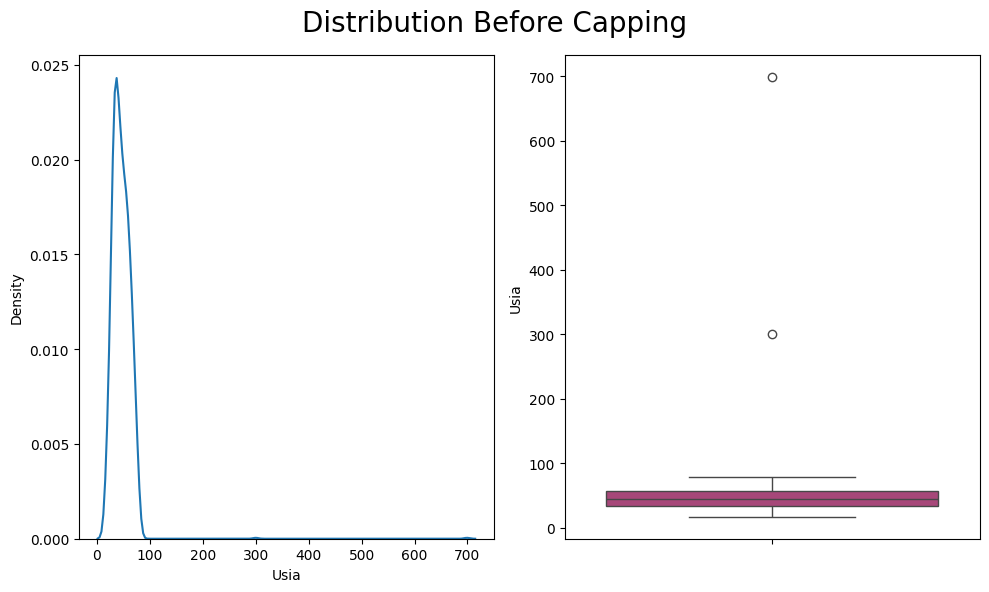

In [ ]:
plt.figure(figsize=(10,6))
plt.suptitle("Distribution Before Capping", fontsize=20)
plt.subplot(1,2,1)
sns.kdeplot(data = data_nasabah['Usia'])
plt.subplot(1,2,2)
sns.boxplot(data = data_nasabah['Usia'], palette="magma")
plt.tight_layout()
plt.show()

In [ ]:
#Menentukan Q1 & Q3
q1 = data_nasabah['Usia'].quantile(0.25)
q3 = data_nasabah['Usia'].quantile(0.75)
q1, q3

(34.0, 57.0)

In [ ]:
IQR = q3 - q1
IQR

23.0

In [ ]:
#capping & Inter-Quertile Range
data_nasabah_new = data_nasabah[(data_nasabah['Usia'] >= q1 - (1.5*IQR)) & (data_nasabah['Usia'] <= q3 + (1.5*IQR))]

<ipython-input-211-f5b22a99a65e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data_nasabah_new['Usia'], palette="magma")


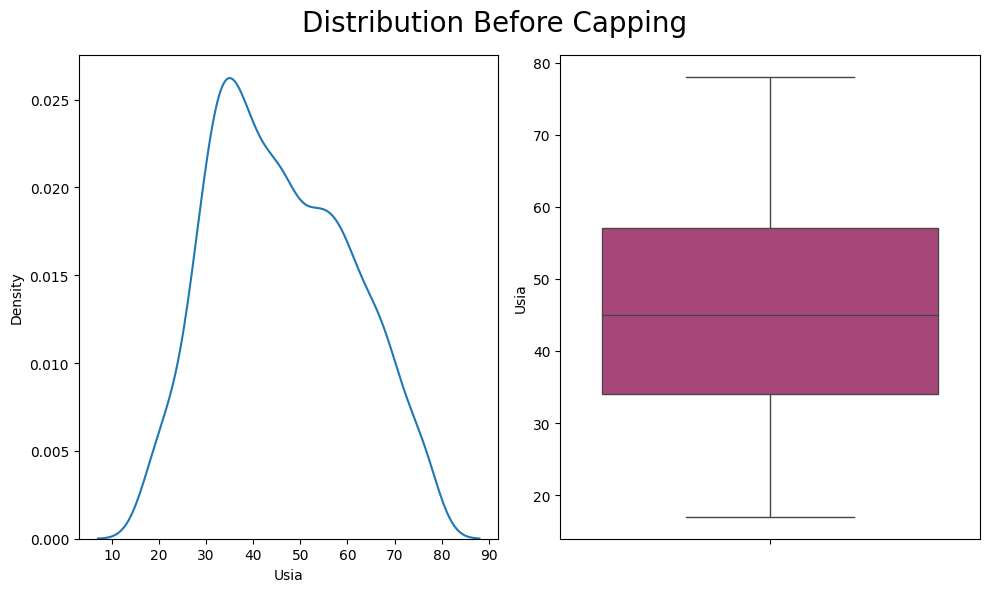

In [ ]:
plt.figure(figsize=(10,6))
plt.suptitle("Distribution Before Capping", fontsize=20)
plt.subplot(1,2,1)
sns.kdeplot(data = data_nasabah_new['Usia'])
plt.subplot(1,2,2)
sns.boxplot(data = data_nasabah_new['Usia'], palette="magma")
plt.tight_layout()
plt.show()

#5. Variable Selection


In [ ]:
#memilih variabel yang akan digunakan untuk membuat model Predictions Machine Learning.
data_final = data_nasabah_new[['ID_NPK','Usia','Pekerjaan','Kecamatan','Lama_Kerja_Bisnis','Penghasilan_Nasabah','Pengeluaran','Sisa_Penghasilan','Status_Rumah','Verifikasi','Status']]
data_final.shape


(1623, 11)

#6. EDA (Exploratory Data Analysis) & Distribution Data (Visualization)

<Axes: >

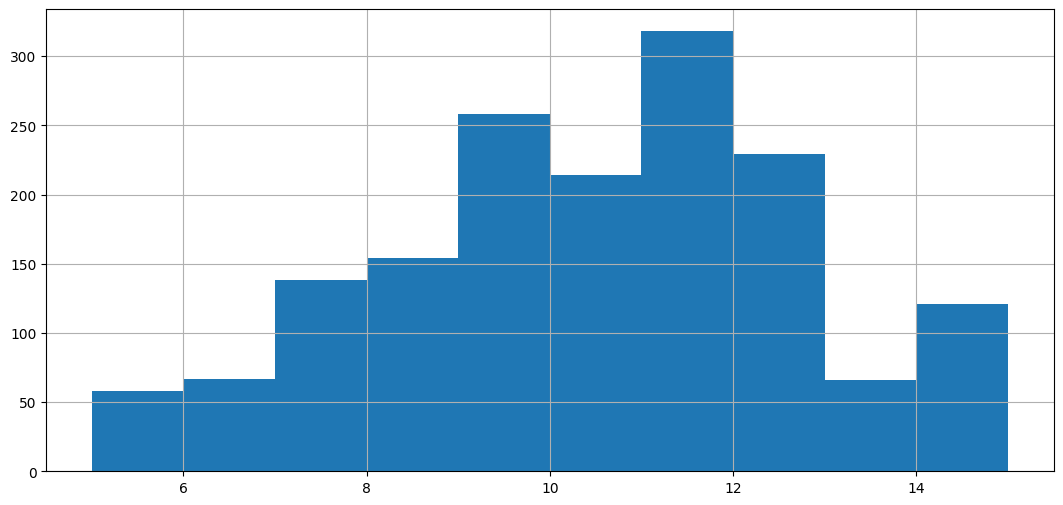

In [ ]:
#Histogram
histogram = data_final['Lama_Kerja_Bisnis']
plt.rcParams["figure.figsize"] = (13,6)
histogram.hist()

<Axes: >

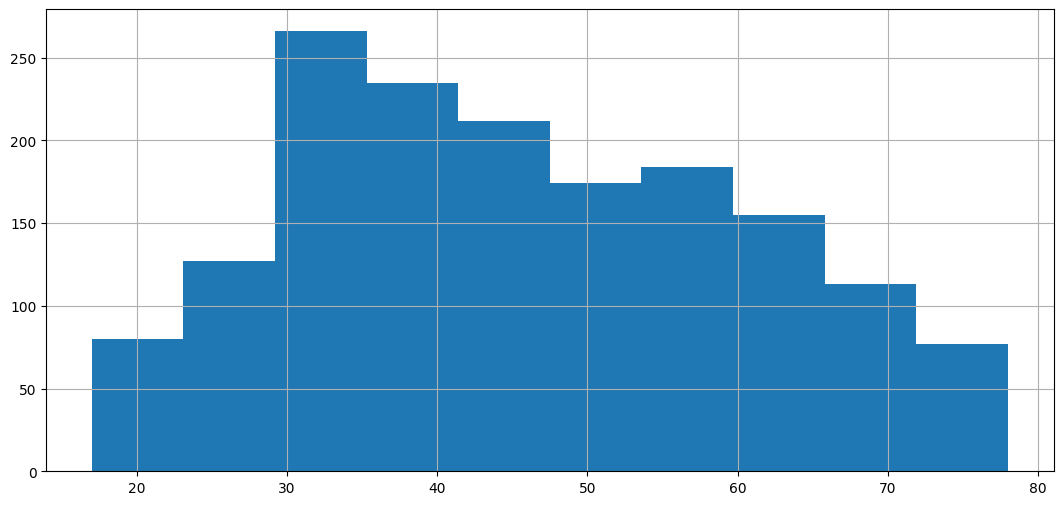

In [ ]:
#Histogram
usia = data_final['Usia']
plt.rcParams["figure.figsize"] = (13,6)
usia.hist()

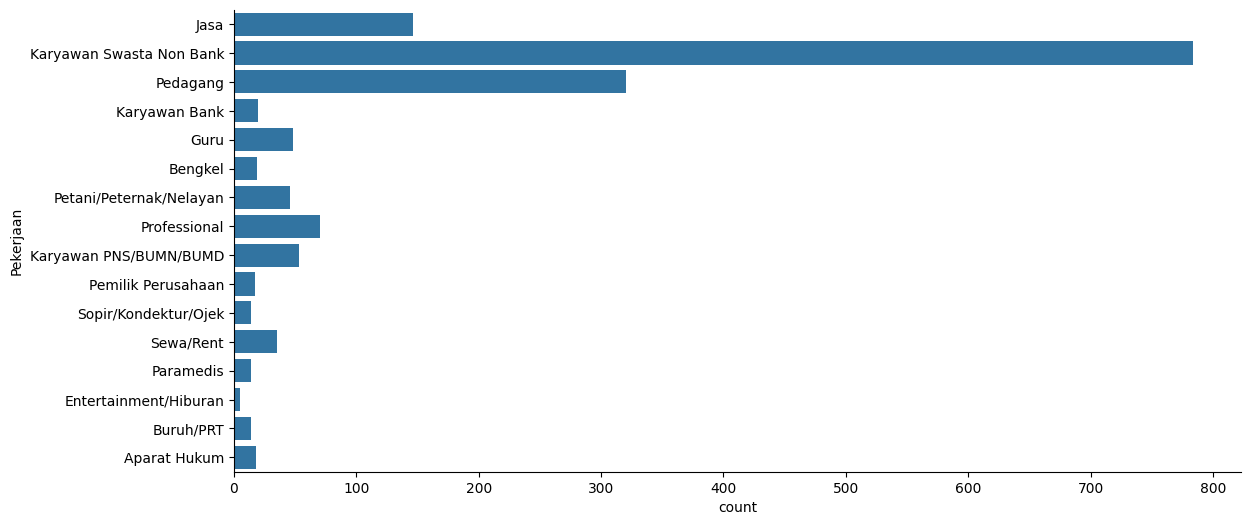

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Pekerjaan', data=data_final)
sns.despine()

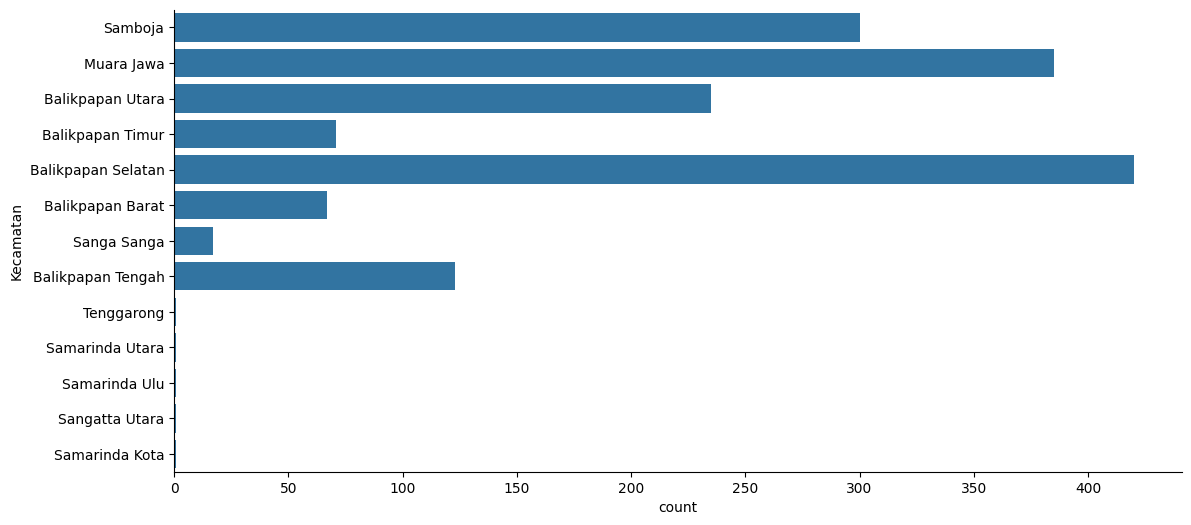

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Kecamatan', data=data_final)
sns.despine()

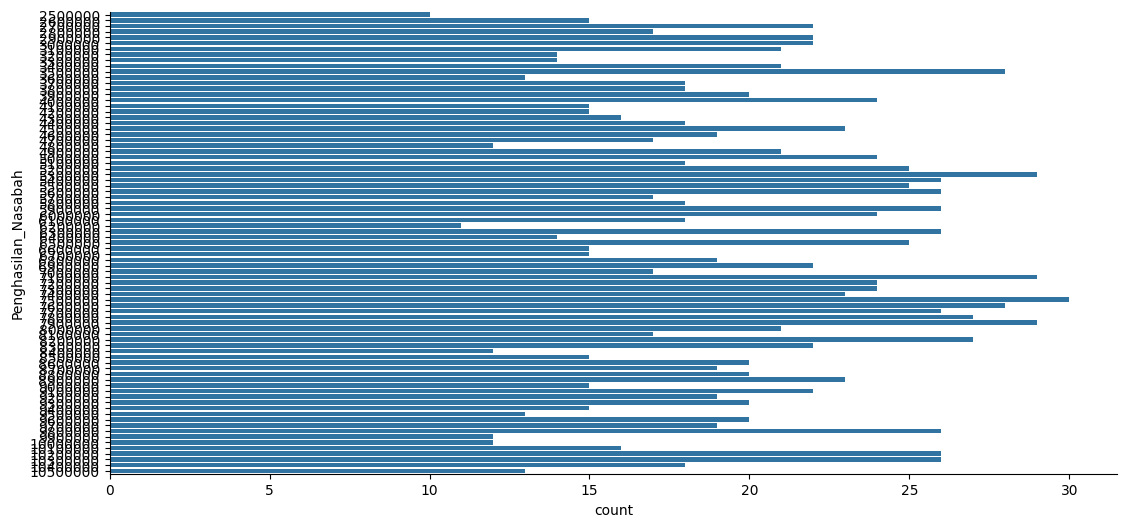

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Penghasilan_Nasabah', data=data_final)
sns.despine()

In [ ]:
#Fungsi membuat pecahan by Quntile
print('Pecahan 1', data_final['Penghasilan_Nasabah'].quantile(q=0.20))
print('Pecahan 2', data_final['Penghasilan_Nasabah'].quantile(q=0.40))
print('Pecahan 3',data_final['Penghasilan_Nasabah'].quantile(q=0.50))
print('Pecahan 4',data_final['Penghasilan_Nasabah'].quantile(q=0.85))
print('Pecahan 5',data_final['Penghasilan_Nasabah'].quantile(q=1))

Pecahan 1 4200000.0
Pecahan 2 5800000.0
Pecahan 3 6600000.0
Pecahan 4 9200000.0
Pecahan 5 10500000.0


In [ ]:
#Fungsi untuk membuat kelompok Penghasiln Nasabah
def Penghasilan_Nasabah(dataframe):
    dataframe.loc[dataframe['Penghasilan_Nasabah'] <= 4200000, 'Penghasilan_Nasabah'] = 1
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 4200000) & (dataframe['Penghasilan_Nasabah'] <= 5800000), 'Penghasilan_Nasabah'] = 2
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 5800000) & (dataframe['Penghasilan_Nasabah'] <= 6600000), 'Penghasilan_Nasabah'] = 3
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 6600000) & (dataframe['Penghasilan_Nasabah'] <= 9200000), 'Penghasilan_Nasabah'] = 4
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 9200000) & (dataframe['Penghasilan_Nasabah'] <= 10500000), 'Penghasilan_Nasabah'] = 5

    return dataframe

Penghasilan_Nasabah(data_final);

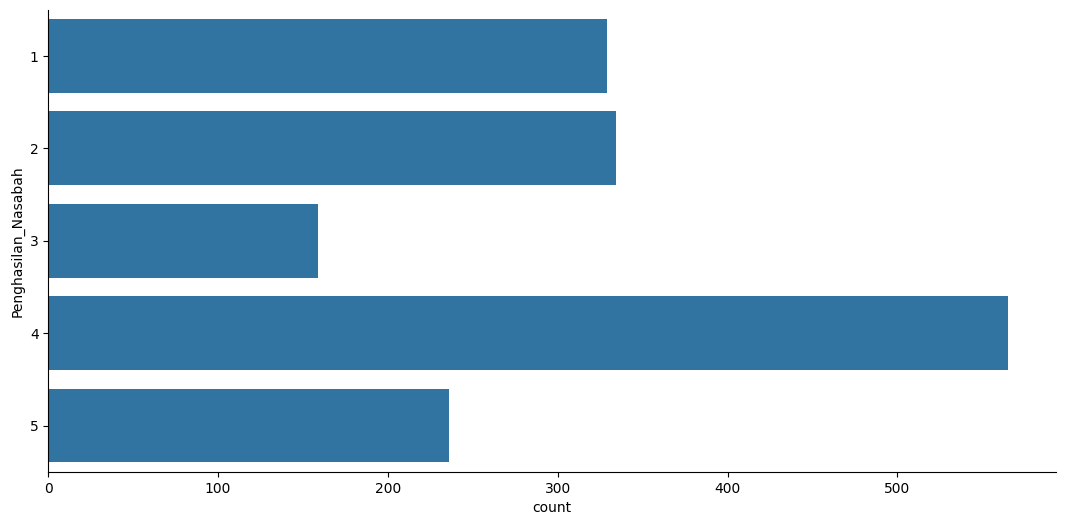

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Penghasilan_Nasabah', data=data_final)
sns.despine()

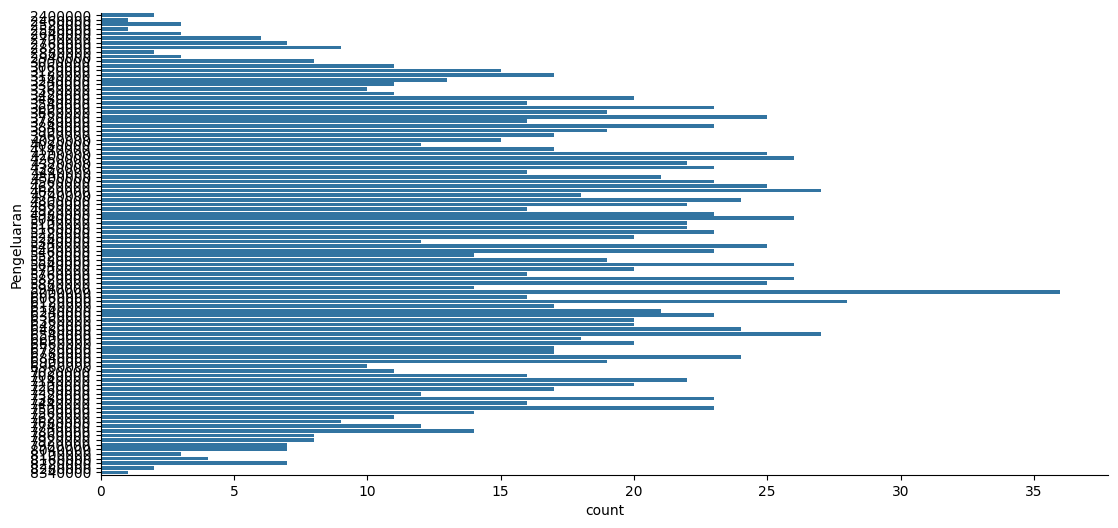

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Pengeluaran', data=data_final)
sns.despine()

In [ ]:
#Fungsi membuat pecahan by Quntile
print('Pecahan 1', data_final['Pengeluaran'].quantile(q=0.20))
print('Pecahan 2', data_final['Pengeluaran'].quantile(q=0.40))
print('Pecahan 3',data_final['Pengeluaran'].quantile(q=0.50))
print('Pecahan 4',data_final['Pengeluaran'].quantile(q=0.85))
print('Pecahan 5',data_final['Pengeluaran'].quantile(q=1))

Pecahan 1 4020000.0
Pecahan 2 4980000.0
Pecahan 3 5400000.0
Pecahan 4 7080000.0
Pecahan 5 8340000.0


In [ ]:
#Fungsi untuk membuat kelompok Penghasiln Nasabah
def Pengeluaran(dataframe):
    dataframe.loc[dataframe['Pengeluaran'] <= 4020000, 'Pengeluaran'] = 1
    dataframe.loc[(dataframe['Pengeluaran'] > 4020000) & (dataframe['Pengeluaran'] <= 980000), 'Pengeluaran'] = 2
    dataframe.loc[(dataframe['Pengeluaran'] > 980000) & (dataframe['Pengeluaran'] <= 5400000), 'Pengeluaran'] = 3
    dataframe.loc[(dataframe['Pengeluaran'] > 5400000) & (dataframe['Pengeluaran'] <= 7080000), 'Pengeluaran'] = 4
    dataframe.loc[(dataframe['Pengeluaran'] > 7080000) & (dataframe['Pengeluaran'] <= 8340000), 'Pengeluaran'] = 5

    return dataframe

Pengeluaran(data_final);

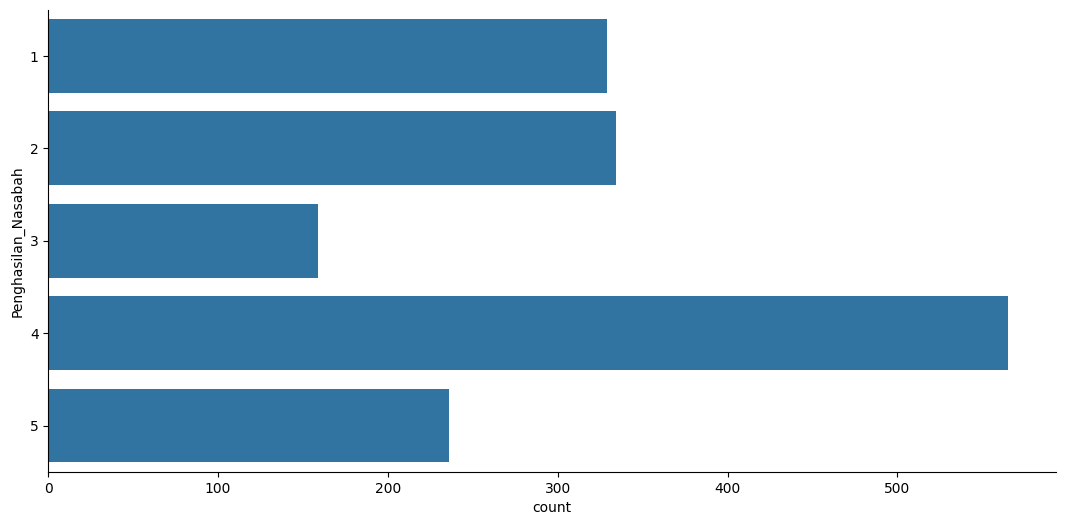

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Penghasilan_Nasabah', data=data_final)
sns.despine()

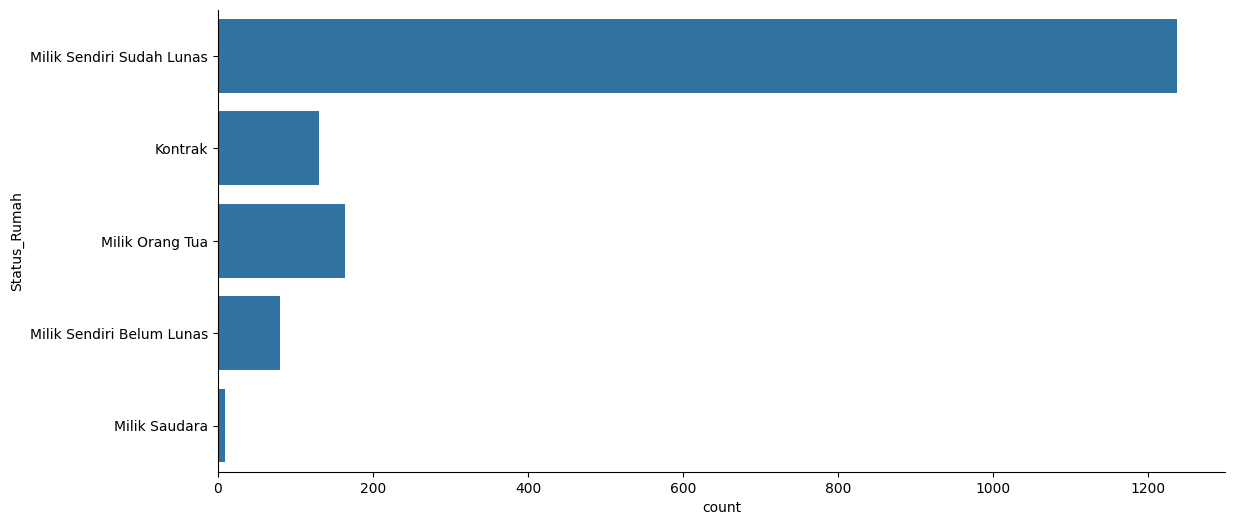

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Status_Rumah', data=data_final)
sns.despine()

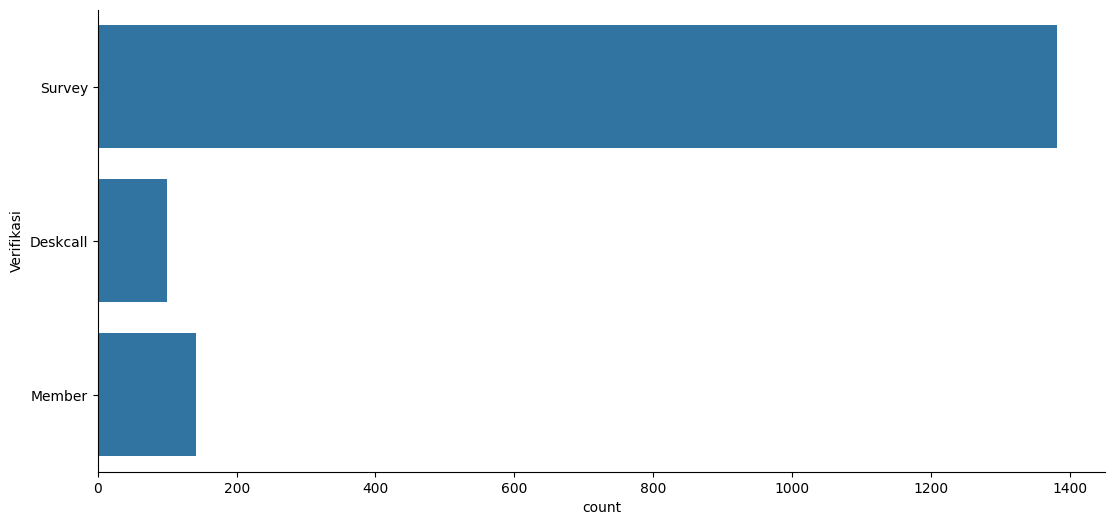

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Verifikasi', data=data_final)
sns.despine()

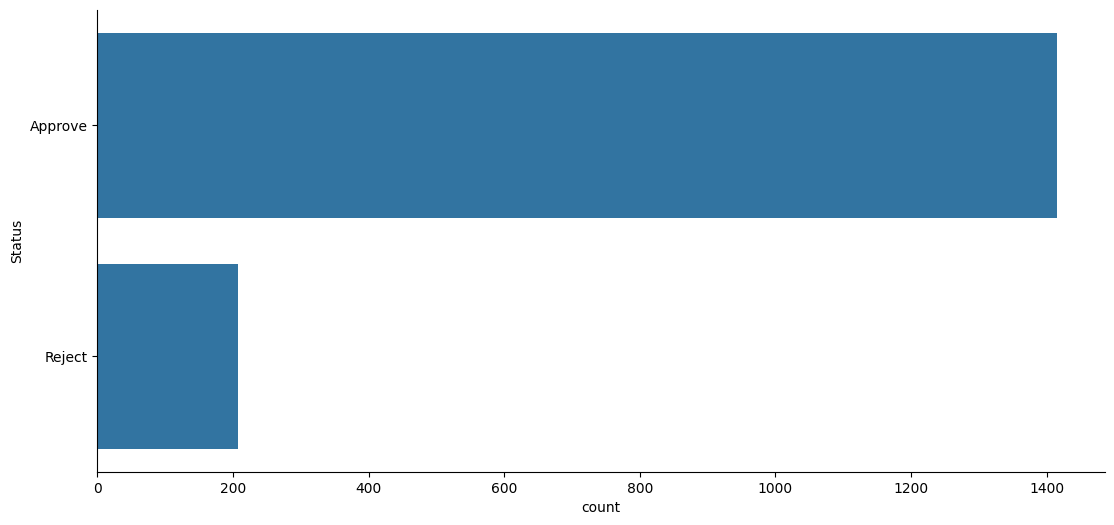

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Status', data=data_final)
sns.despine()

In [ ]:
#Fungsi membuat pecahan by Quntile
print('Pecahan 1', data_final['Lama_Kerja_Bisnis'].quantile(q=0.20))
print('Pecahan 2', data_final['Lama_Kerja_Bisnis'].quantile(q=0.40))
print('Pecahan 3',data_final['Lama_Kerja_Bisnis'].quantile(q=0.50))
print('Pecahan 4',data_final['Lama_Kerja_Bisnis'].quantile(q=0.85))
print('Pecahan 5',data_final['Lama_Kerja_Bisnis'].quantile(q=1))

Pecahan 1 8.0
Pecahan 2 9.0
Pecahan 3 10.0
Pecahan 4 12.0
Pecahan 5 15.0


In [ ]:
#Fungsi untuk membuat kelompok lama Kerja Bisnis
def Lama_Kerja_Bisnis(dataframe):
    dataframe.loc[dataframe['Lama_Kerja_Bisnis'] <= 8, 'Lama_Kerja_Bisnis'] = 1
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 8) & (dataframe['Lama_Kerja_Bisnis'] <= 9), 'Lama_Kerja_Bisnis'] = 2
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 9) & (dataframe['Lama_Kerja_Bisnis'] <= 10), 'Lama_Kerja_Bisnis'] = 3
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 10) & (dataframe['Lama_Kerja_Bisnis'] <= 12), 'Lama_Kerja_Bisnis'] = 4
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 12) & (dataframe['Lama_Kerja_Bisnis'] <= 15), 'Lama_Kerja_Bisnis'] = 5

    return dataframe

Lama_Kerja_Bisnis(data_final);

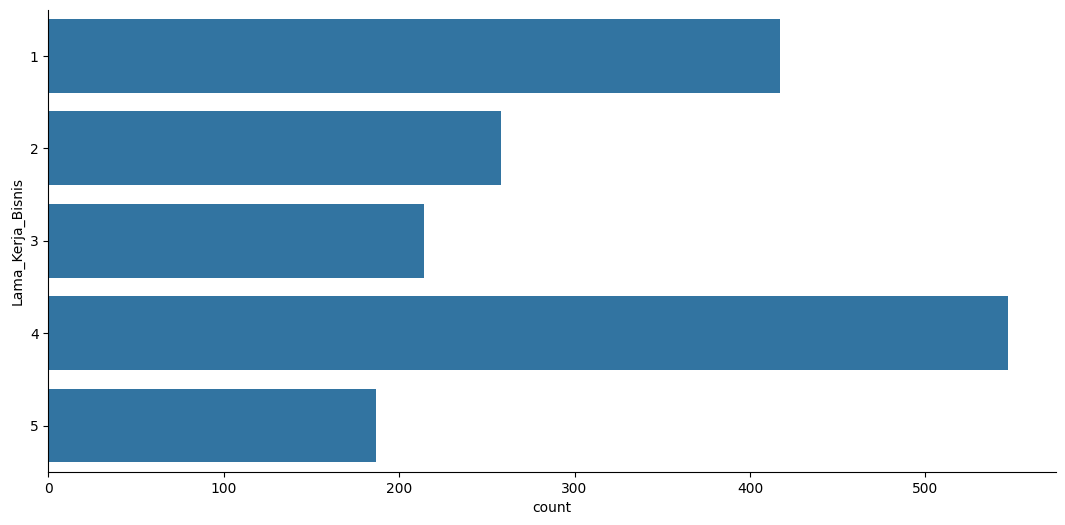

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Lama_Kerja_Bisnis', data=data_final)
sns.despine()

In [ ]:
#Fungsi membuat pecahan by Quntile
print('Pecahan 1', data_final['Sisa_Penghasilan'].quantile(q=0.20))
print('Pecahan 2', data_final['Sisa_Penghasilan'].quantile(q=0.40))
print('Pecahan 3',data_final['Sisa_Penghasilan'].quantile(q=0.50))
print('Pecahan 4',data_final['Sisa_Penghasilan'].quantile(q=0.85))
print('Pecahan 5',data_final['Sisa_Penghasilan'].quantile(q=1))

Pecahan 1 148000.00000000067
Pecahan 2 860000.0
Pecahan 3 1140000.0
Pecahan 4 2180000.0
Pecahan 5 3300000.0


In [ ]:
#Fungsi untuk membuat kelompok lama Kerja Bisnis
def Sisa_Penghasilan(dataframe):
    dataframe.loc[dataframe['Sisa_Penghasilan'] <= 148000, 'Sisa_Penghasilan'] = 1
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 148000) & (dataframe['Sisa_Penghasilan'] <= 860000), 'Sisa_Penghasilan'] = 2
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 860000) & (dataframe['Sisa_Penghasilan'] <= 1140000), 'Sisa_Penghasilan'] = 3
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 1140000) & (dataframe['Sisa_Penghasilan'] <= 2180000), 'Sisa_Penghasilan'] = 4
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 2180000) & (dataframe['Sisa_Penghasilan'] <= 3300000), 'Sisa_Penghasilan'] = 5

    return dataframe

Sisa_Penghasilan(data_final);

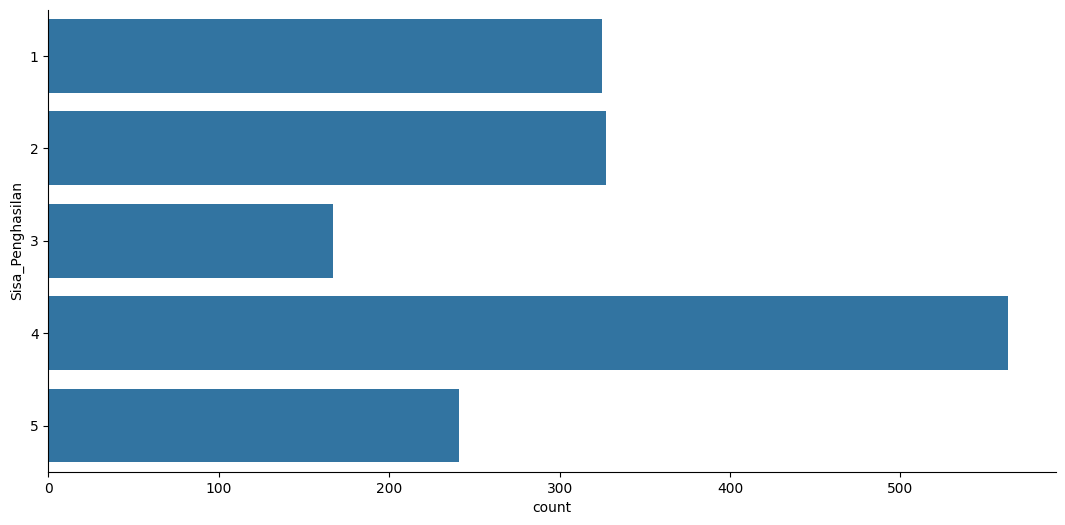

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
sns.countplot(y='Sisa_Penghasilan', data=data_final)
sns.despine()

#6. Transformasi data

In [ ]:
label_data = data_final.copy()
label_encoder = LabelEncoder()

for col in label_data[['Pekerjaan','Kecamatan','Status_Rumah','Verifikasi','Status']]:
  label_data[col] = label_encoder.fit_transform(label_data[col])

In [ ]:
data_final=label_data
data_final.head(100)

,ID_NPK,Usia,Pekerjaan,Kecamatan,Lama_Kerja_Bisnis,Penghasilan_Nasabah,Pengeluaran,Sisa_Penghasilan,Status_Rumah,Verifikasi,Status
0,1,49,5,9,3,5,4,5,4,2,0
1,2,39,8,5,1,2,3,3,4,2,0
2,3,70,10,5,5,3,3,3,4,2,0
3,4,60,6,4,1,3,3,4,4,2,0
4,5,54,8,3,2,2,3,2,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...
97,98,31,8,4,4,5,5,4,4,0,0
98,99,76,8,0,5,4,4,4,1,2,0
99,100,76,15,9,2,2,1,2,4,2,0
100,101,57,8,5,1,1,1,1,4,2,0


In [ ]:
data_final.isnull().sum()

,0
ID_NPK,0
Usia,0
Pekerjaan,0
Kecamatan,0
Lama_Kerja_Bisnis,0
Penghasilan_Nasabah,0
Pengeluaran,0
Sisa_Penghasilan,0
Status_Rumah,0
Verifikasi,0


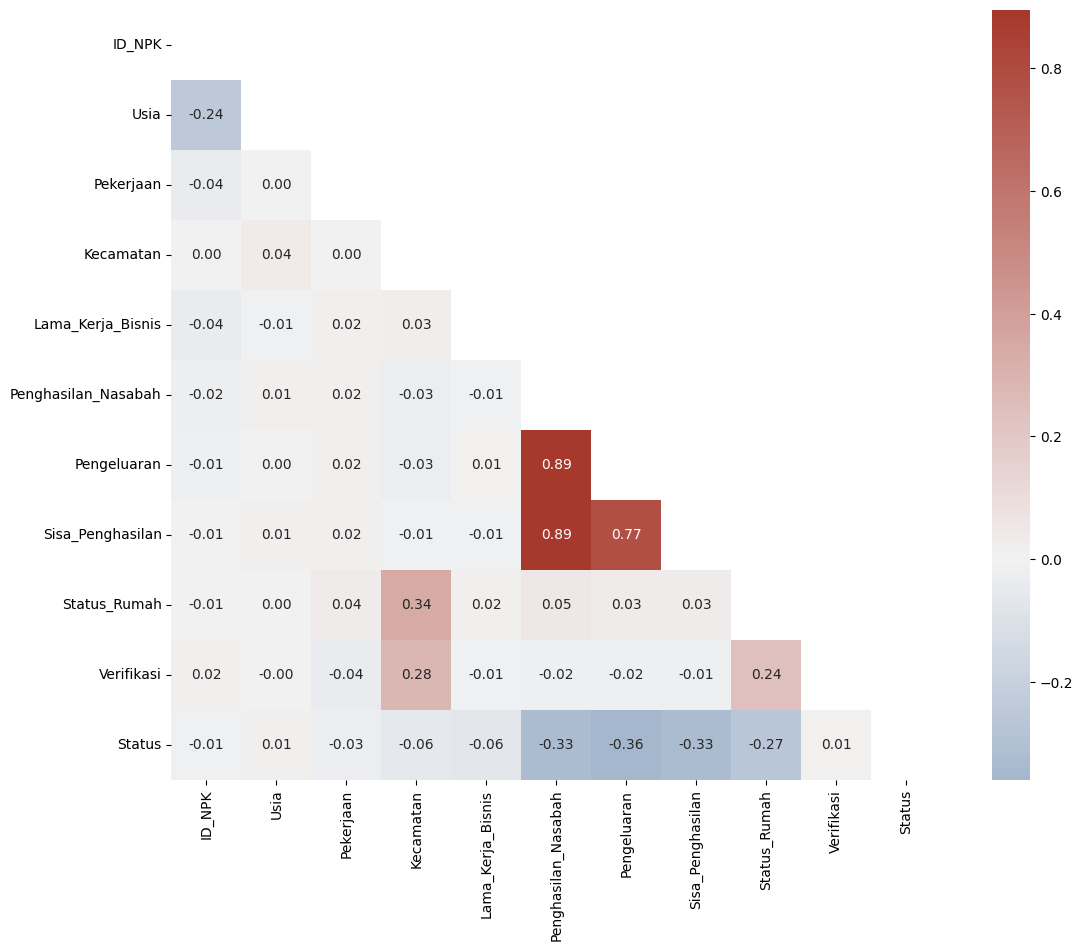

In [ ]:
matrix = data_final.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

plt.figure(figsize=(13,10))
sns.heatmap(matrix, mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

plt.show()

#8. Normalisasi/Standarisasi

Min MAx Scaler

In [ ]:
#kecualikan dulu dari kolom yang tidak sebagai input algoritma
#data_final.drop(['ID_NPK'], axis=1, inplace=True)

In [ ]:
#skala semua kolom (yg memiliki nilai > 1)
#for_scale = [col for col in data_final.columns if data_final[col].max() > 1]

#mms = MinMaxScaler()
#scaled = mms.fit_transform(data_final[for_scale])
#scaled = pd.DataFrame(scaled, columns=for_scale)

#replace original dengan kolom yg sudah di skala-kan
#for col in scaled:
#  data_final[col]=scaled[col]

In [ ]:
#data_final.head()

In [ ]:
#data_final['Lama_Kerja_Bisnis'].unique()

#9. Spliting dataset train & test & parameter understanding

In [ ]:
#Drop ID_NPK tidak kita gunakan dalam prediksi
to_drop = ['ID_NPK']
data_final.drop(to_drop, inplace=True, axis=1)

In [ ]:
X = data_final.drop('Status', axis=1)
y = data_final['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10) #80% : 20%

##Standard Scaler
(tapi penggunaannya lebih mudah setelah splitting dataset)

In [ ]:
#penggunaan Standard Scaler digabungkan dengan splitting dataset pada saat menentukan data X train dan data X test
#yang perlu di normalisasi hanya pada variabel prediktor
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [ ]:
#melihat variance dari variabel
#pca = PCA(n_components=5)
#pca_variabel = pca.fit_transform(X_train)
#pca.explained_variance_ratio_

In [ ]:
#Dimensional Reduction / Variabel Selection
#menentukan berapa object komponen yg terbentuk
#pca = PCA(n_components=5)

#eksekusi ke variabel prediktor
#X_train_pca = pca.fit_transform(X_train)
#X_train_pca = pca.fit_transform(X_test)

#10. Memeriksa Imbalance Data dan Handling Imbalance

In [ ]:
print(data_final.Status.unique())
Counter(data_final.Status)

[0 1]


Counter({0: 1415, 1: 208})

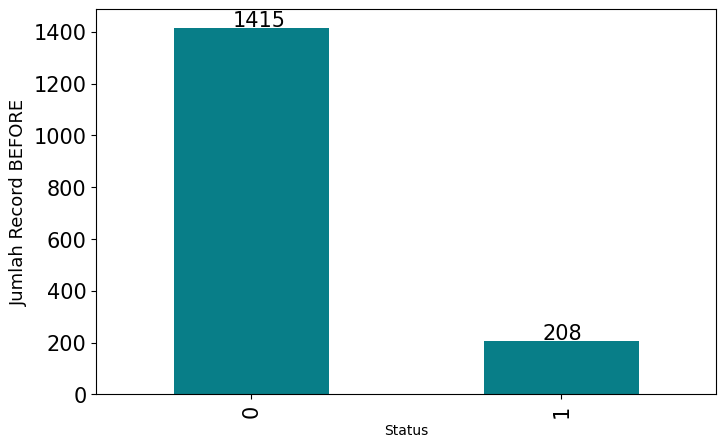

In [ ]:
ax = data_final['Status'].value_counts().plot(kind='bar', figsize=(8,5), fontsize=15, color='#087E88')
ax.set_ylabel('Jumlah Record BEFORE', fontsize=13)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() + 5, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
#eksekusi metode smote untuk imbalance handling
sm = SMOTE(random_state=2, k_neighbors=10)
X_train_sm, y_train_sm = sm.fit_resample(X, y)

In [ ]:
data_train = y_train_sm

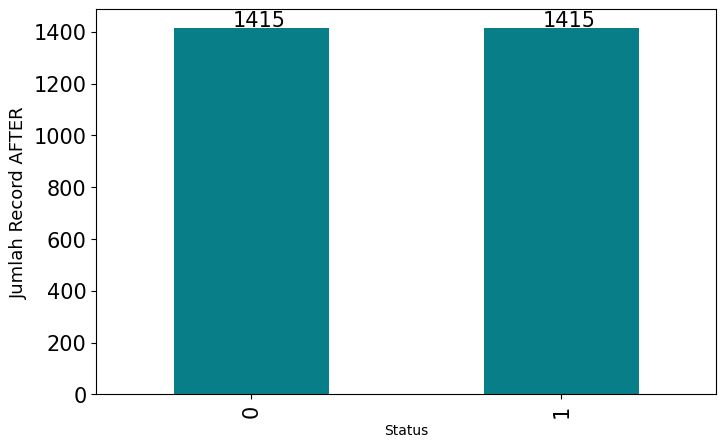

In [ ]:
ax = data_train.value_counts().plot(kind='bar', figsize=(8,5), fontsize=15, color='#087E88')
ax.set_ylabel('Jumlah Record AFTER', fontsize=13)

for i in ax.patches:
  ax.text(i.get_x() + 0.19, i.get_height() + 5, str(round(i.get_height(), 2)), fontsize=15)

#11. Modeling Machine Learning (Classification)

Accuracy: 84.31%
Precision: 50.00%
Recall: 70.59%
F1 Score: 58.54%
[[238  36]
 [ 15  36]]


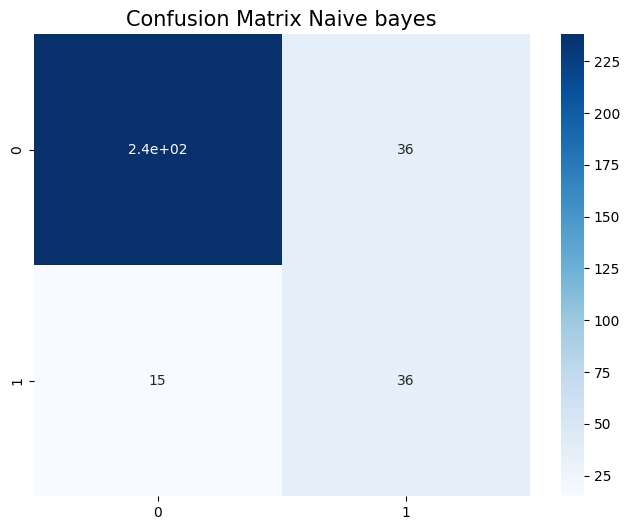

In [ ]:
#naive bayes algorithm
nb = GaussianNB()

nb.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
nb_predicted = nb.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

nb_acc_score = accuracy_score(y_test, nb_predicted)
nb_prc_score = precision_score(y_test, nb_predicted)
nb_rec_score = recall_score(y_test, nb_predicted)
nb_f1_score = f1_score(y_test, nb_predicted)

print("Accuracy: %.2f%%" % (nb_acc_score*100))
print("Precision: %.2f%%" % (nb_prc_score*100))
print("Recall: %.2f%%" % (nb_rec_score*100))
print("F1 Score: %.2f%%" % (nb_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, nb_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
nb_conf_matrix = confusion_matrix(y_test, nb_predicted)
print(nb_conf_matrix)

Accuracy: 85.54%
Precision: 83.33%
Recall: 9.80%
F1 Score: 17.54%
[[273   1]
 [ 46   5]]


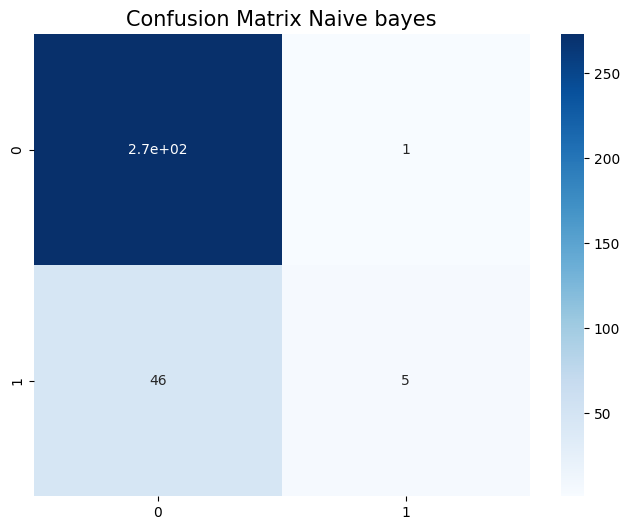

In [ ]:
#K-Mearest Neighbor
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
knn_predicted = knn.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_prc_score = precision_score(y_test, knn_predicted)
knn_rec_score = recall_score(y_test, knn_predicted)
knn_f1_score = f1_score(y_test, knn_predicted)

print("Accuracy: %.2f%%" % (knn_acc_score*100))
print("Precision: %.2f%%" % (knn_prc_score*100))
print("Recall: %.2f%%" % (knn_rec_score*100))
print("F1 Score: %.2f%%" % (knn_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, knn_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
print(knn_conf_matrix)

Accuracy: 93.54%
Precision: 75.86%
Recall: 86.27%
F1 Score: 80.73%
[[260  14]
 [  7  44]]


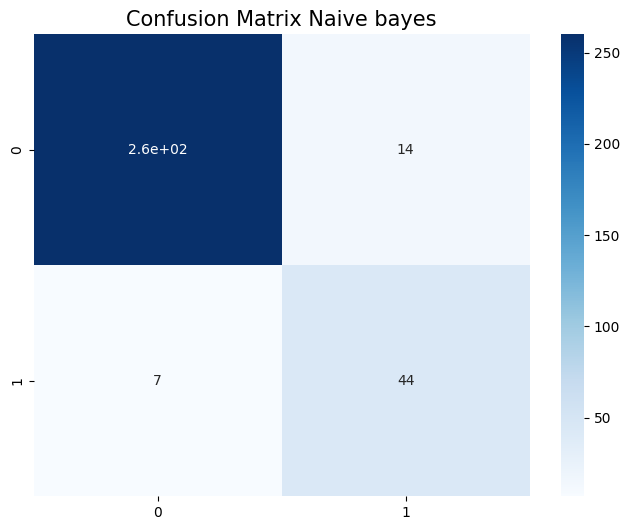

In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=10)

dt.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
dt_predicted = dt.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

dt_acc_score = accuracy_score(y_test, dt_predicted)
dt_prc_score = precision_score(y_test, dt_predicted)
dt_rec_score = recall_score(y_test, dt_predicted)
dt_f1_score = f1_score(y_test, dt_predicted)

print("Accuracy: %.2f%%" % (dt_acc_score*100))
print("Precision: %.2f%%" % (dt_prc_score*100))
print("Recall: %.2f%%" % (dt_rec_score*100))
print("F1 Score: %.2f%%" % (dt_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, dt_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
print(dt_conf_matrix)

Accuracy: 97.17%
Precision: 97.97%
Recall: 96.67%
F1 Score: 97.32%
[[260   6]
 [ 10 290]]


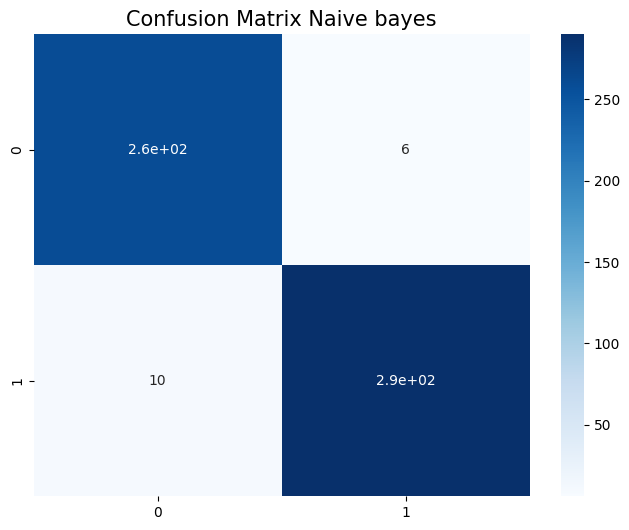

In [ ]:
#Decision Tree (With SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

dt_2 = DecisionTreeClassifier(criterion='entropy', random_state=10)

dt_2.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
dt_2_predicted = dt_2.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

dt_2_acc_score = accuracy_score(y_test, dt_2_predicted)
dt_2_prc_score = precision_score(y_test, dt_2_predicted)
dt_2_rec_score = recall_score(y_test, dt_2_predicted)
dt_2_f1_score = f1_score(y_test, dt_2_predicted)

print("Accuracy: %.2f%%" % (dt_2_acc_score*100))
print("Precision: %.2f%%" % (dt_2_prc_score*100))
print("Recall: %.2f%%" % (dt_2_rec_score*100))
print("F1 Score: %.2f%%" % (dt_2_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, dt_2_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
dt_2_conf_matrix = confusion_matrix(y_test, dt_2_predicted)
print(dt_2_conf_matrix)

Accuracy: 84.45%
Precision: 93.09%
Recall: 76.33%
F1 Score: 83.88%
[[249  17]
 [ 71 229]]


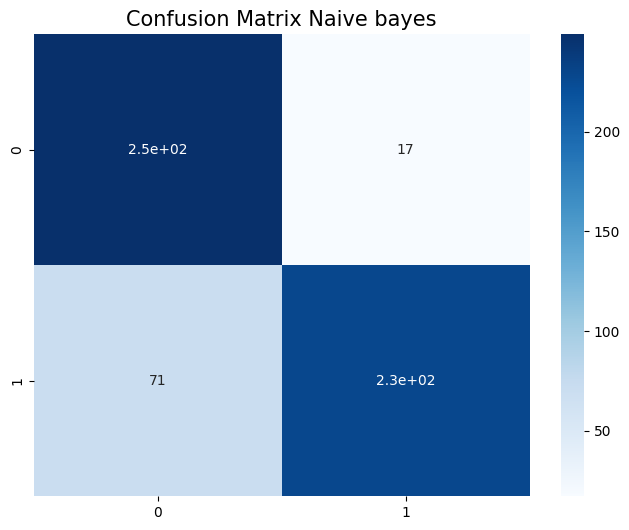

In [ ]:
#Random Forest (SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=2, random_state=0)

rf.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
rf_predicted = rf.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_prc_score = precision_score(y_test, rf_predicted)
rf_rec_score = recall_score(y_test, rf_predicted)
rf_f1_score = f1_score(y_test, rf_predicted)

print("Accuracy: %.2f%%" % (rf_acc_score*100))
print("Precision: %.2f%%" % (rf_prc_score*100))
print("Recall: %.2f%%" % (rf_rec_score*100))
print("F1 Score: %.2f%%" % (rf_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, rf_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print(rf_conf_matrix)

Accuracy: 80.74%
Precision: 85.24%
Recall: 77.00%
F1 Score: 80.91%
[[226  40]
 [ 69 231]]


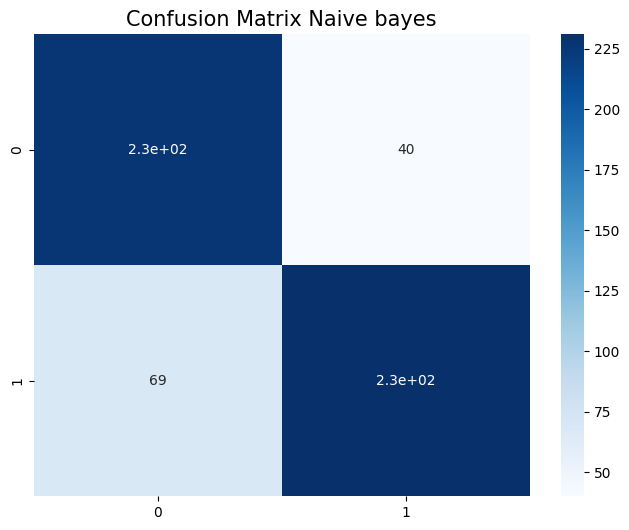

In [ ]:
#Random Forest (SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

et = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=2, random_state=0)

et.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
et_predicted = et.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

et_acc_score = accuracy_score(y_test, et_predicted)
et_prc_score = precision_score(y_test, et_predicted)
et_rec_score = recall_score(y_test, et_predicted)
et_f1_score = f1_score(y_test, et_predicted)

print("Accuracy: %.2f%%" % (et_acc_score*100))
print("Precision: %.2f%%" % (et_prc_score*100))
print("Recall: %.2f%%" % (et_rec_score*100))
print("F1 Score: %.2f%%" % (et_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, et_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
et_conf_matrix = confusion_matrix(y_test, et_predicted)
print(et_conf_matrix)

Accuracy: 97.88%
Precision: 98.65%
Recall: 97.33%
F1 Score: 97.99%
[[262   4]
 [  8 292]]


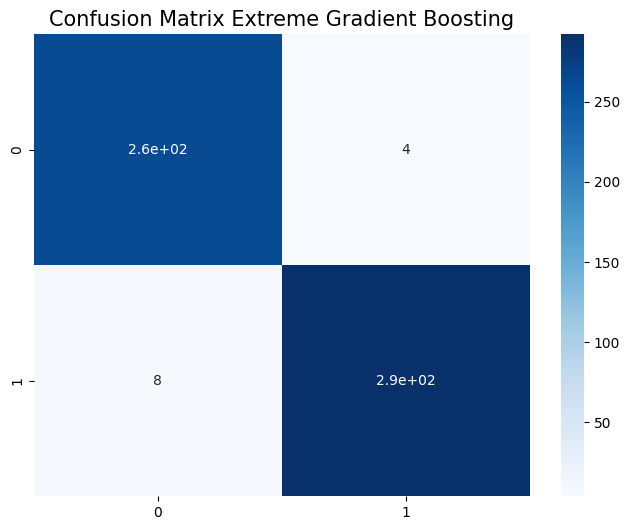

In [ ]:
#Extreme Gradient Boosting (SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

xgb = XGBClassifier()

xgb.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
xgb_predicted = xgb.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

xgb_acc_score = accuracy_score(y_test, xgb_predicted)
xgb_prc_score = precision_score(y_test, xgb_predicted)
xgb_rec_score = recall_score(y_test, xgb_predicted)
xgb_f1_score = f1_score(y_test, xgb_predicted)

print("Accuracy: %.2f%%" % (xgb_acc_score*100))
print("Precision: %.2f%%" % (xgb_prc_score*100))
print("Recall: %.2f%%" % (xgb_rec_score*100))
print("F1 Score: %.2f%%" % (xgb_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, xgb_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Extreme Gradient Boosting', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
print(xgb_conf_matrix)

[LightGBM] [Info] Number of positive: 1115, number of negative: 1149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 2264, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492491 -> initscore=-0.030038
[LightGBM] [Info] Start training from score -0.030038
Accuracy: 98.41%
Precision: 99.32%
Recall: 97.67%
F1 Score: 98.49%
[[264   2]
 [  7 293]]


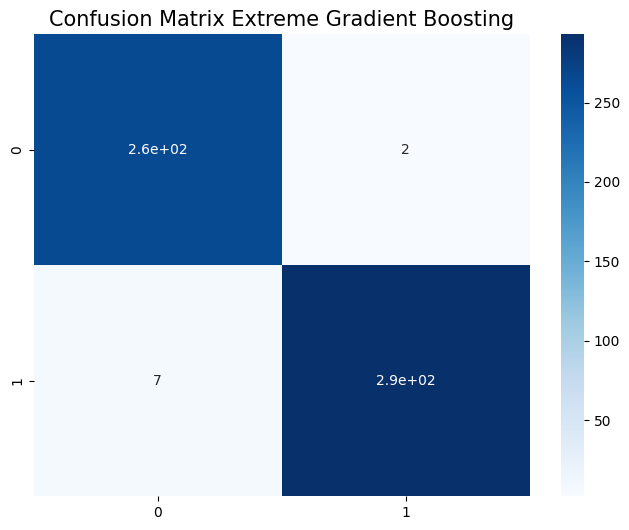

In [ ]:
#Light Gradient Boosting Machine (SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

import lightgbm as lgb
lgb = lgb.LGBMClassifier()

lgb.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
lgb_predicted = lgb.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

lgb_acc_score = accuracy_score(y_test, lgb_predicted)
lgb_prc_score = precision_score(y_test, lgb_predicted)
lgb_rec_score = recall_score(y_test, lgb_predicted)
lgb_f1_score = f1_score(y_test, lgb_predicted)

print("Accuracy: %.2f%%" % (lgb_acc_score*100))
print("Precision: %.2f%%" % (lgb_prc_score*100))
print("Recall: %.2f%%" % (lgb_rec_score*100))
print("F1 Score: %.2f%%" % (lgb_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, lgb_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Extreme Gradient Boosting', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
lgb_conf_matrix = confusion_matrix(y_test, lgb_predicted)
print(lgb_conf_matrix)

Accuracy: 84.98%
Precision: 85.71%
Recall: 86.00%
F1 Score: 85.86%
[[223  43]
 [ 42 258]]


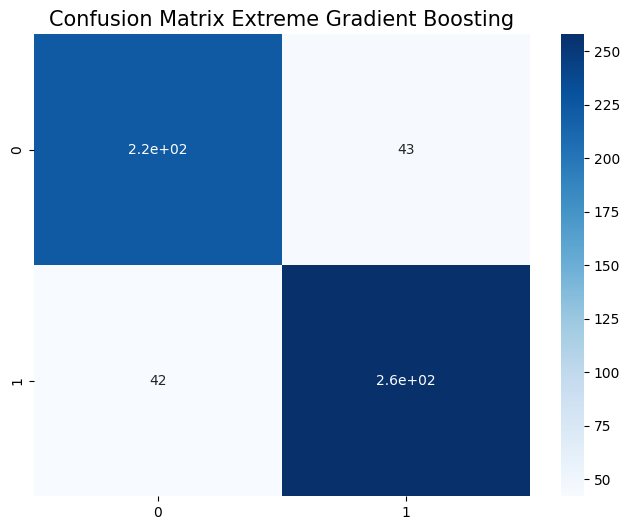

In [ ]:
#Logistic Regression (SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

lr = LogisticRegression()

lr.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
lr_predicted = lr.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

lr_acc_score = accuracy_score(y_test, lr_predicted)
lr_prc_score = precision_score(y_test, lr_predicted)
lr_rec_score = recall_score(y_test, lr_predicted)
lr_f1_score = f1_score(y_test, lr_predicted)

print("Accuracy: %.2f%%" % (lr_acc_score*100))
print("Precision: %.2f%%" % (lr_prc_score*100))
print("Recall: %.2f%%" % (lr_rec_score*100))
print("F1 Score: %.2f%%" % (lr_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, lr_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Extreme Gradient Boosting', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
print(lr_conf_matrix)

In [ ]:
#Summary Performance masing-masing MODEL Algoritma
model_evaluation = pd.DataFrame({'Model': ['Naive Bayes','K-Nearest Neighbor','DT Not SMOTE','DT With SMOTE', 'RF With SMOTE', 'ET With SMOTE', 'XGB With SMOTE', 'LGB With SMOTE', 'LR With SMOTE'],
                                 'Accuracy':
                                 ["%.2f%%" % (nb_acc_score*100), "%.2f%%" % (knn_acc_score*100), "%.2f%%" % (dt_acc_score*100), "%.2f%%" % (dt_2_acc_score*100), "%.2f%%" % (rf_acc_score*100), "%.2f%%" % (et_acc_score*100), "%.2f%%" % (xgb_acc_score*100), "%.2f%%" % (lgb_acc_score*100),"%.2f%%" % (lr_acc_score*100)],
                                 'Precision':
                                 ["%.2f%%" % (nb_prc_score*100), "%.2f%%" % (knn_prc_score*100), "%.2f%%" % (dt_prc_score*100), "%.2f%%" % (dt_2_prc_score*100), "%.2f%%" % (rf_prc_score*100), "%.2f%%" % (et_prc_score*100), "%.2f%%" % (xgb_prc_score*100), "%.2f%%" % (lgb_prc_score*100), "%.2f%%" % (lr_prc_score*100)],
                                 'recall':
                                 ["%.2f%%" % (nb_rec_score*100), "%.2f%%" % (knn_rec_score*100), "%.2f%%" % (dt_rec_score*100), "%.2f%%" % (dt_2_rec_score*100), "%.2f%%" % (rf_rec_score*100), "%.2f%%" % (et_rec_score*100), "%.2f%%" % (xgb_rec_score*100), "%.2f%%" % (lgb_rec_score*100), "%.2f%%" % (lr_rec_score*100)],
                                 'F1 Score':
                                 ["%.2f%%" % (nb_f1_score*100), "%.2f%%" % (knn_f1_score*100), "%.2f%%" % (dt_f1_score*100), "%.2f%%" % (dt_2_f1_score*100), "%.2f%%" % (rf_f1_score*100), "%.2f%%" % (et_f1_score*100), "%.2f%%" % (xgb_f1_score*100), "%.2f%%" % (lgb_f1_score*100), "%.2f%%" % (lr_f1_score*100)]
                                 })
print(model_evaluation)

                Model Accuracy Precision  recall F1 Score
0         Naive Bayes   84.31%    50.00%  70.59%   58.54%
1  K-Nearest Neighbor   85.54%    83.33%   9.80%   17.54%
2        DT Not SMOTE   93.54%    75.86%  86.27%   80.73%
3       DT With SMOTE   97.17%    97.97%  96.67%   97.32%
4       RF With SMOTE   84.45%    93.09%  76.33%   83.88%
5       ET With SMOTE   80.74%    85.24%  77.00%   80.91%
6      XGB With SMOTE   97.88%    98.65%  97.33%   97.99%
7      LGB With SMOTE   98.41%    99.32%  97.67%   98.49%
8       LR With SMOTE   84.98%    85.71%  86.00%   85.86%


In [ ]:
#menampilkan variabel penting di model algoritma di atas

importance_variabel = pd.DataFrame({'Variabel': ['Usia','Pekerjaan','Kecamatan','Lama_Kerja_Bisnis','Penghasilan_Nasabah',
                                                 'Pengeluaran','Sisa_Penghasilan','Status_Rumah','Verifikasi'],
                                    'Importance': xgb.feature_importances_})
importance_variabel

,Variabel,Importance
0,Usia,0.021525
1,Pekerjaan,0.086515
2,Kecamatan,0.013795
3,Lama_Kerja_Bisnis,0.027050
4,Penghasilan_Nasabah,0.052206
5,Pengeluaran,0.169171
6,Sisa_Penghasilan,0.032227
7,Status_Rumah,0.582191
8,Verifikasi,0.015320


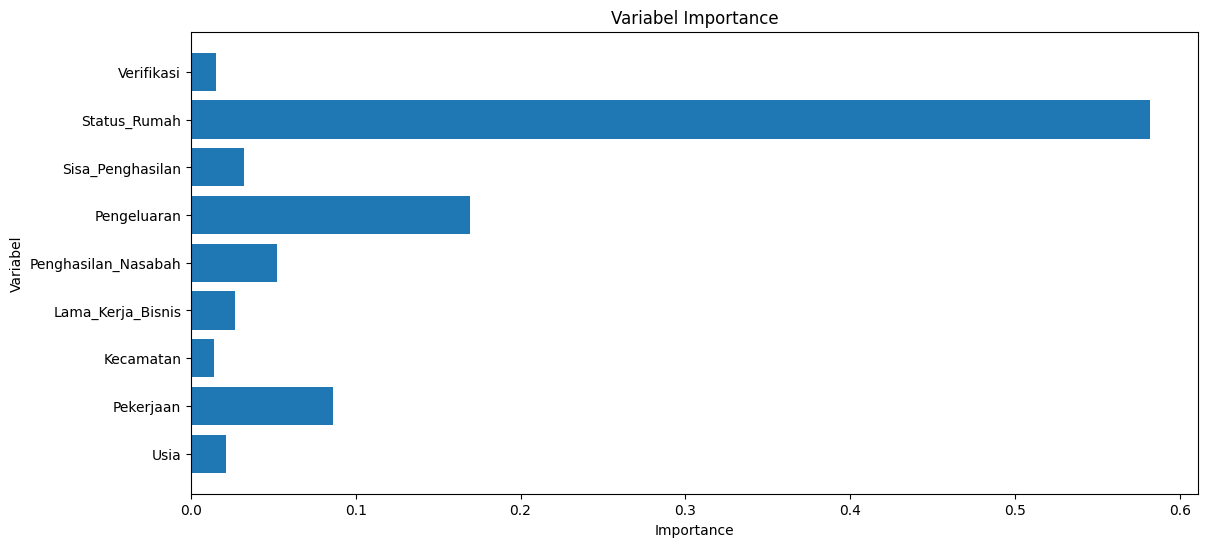

In [ ]:
#bar chart
plt.figure(figsize=(13,6))
plt.barh(importance_variabel['Variabel'], importance_variabel['Importance'])
plt.title('Variabel Importance')
plt.xlabel('Importance')
plt.ylabel('Variabel')
plt.show()

#13. Hyperparameter Tuning & Pengukuran Setelah Tuning

In [ ]:
# # Grid Search Algorithm
# param_grid = {'criterion' : ['gini','entropy'],
#              'splitter' : ['best','random'],
#              'max_depth' : [1,2,3],
#              'min_samples_split' : [1,2,3],
#              'min_samples_leaf' : [1,2,3],
#              'max_features' : [1,2,3],
#              'random_state' : [1,2,3]
#              }

#               # {'criterion' : ['gini','entropy'],
#               # 'splitter' : ['best','random'],
#               # 'max_depth' : ['0','1','2','3','4','5','6','7','8','10','12'],
#               # 'min_samples_split' : ['0','1','2','3','4','5','6','7','8','10','12'],
#               # 'min_samples_leaf' : ['0','1','2','3','4','5','6','7','8','10','12'],
#               # 'max_features' : ['1','2','3','4','5'],
#               # 'random_state' : ['0','1','2','3','4','5','6','7','8','10','12']
#               # }

# dtc = DecisionTreeClassifier()

# grid = GridSearchCV(dtc, param_grid, scoring='accuracy', verbose=1, n_jobs=-1)
# X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=0)
# grid.fit(X_train, y_train)

# #mencetak hasil pemilihan parameter terbaik
# print(grid.best_params_)
# print(grid.best_estimator_)

# grid_predicted = grid.predict(X_test)
# grid_acc_score = accuracy_score(y_test, grid_predicted)


Accuracy: 95.41%
Precision: 96.92%
Recall: 94.33%
F1 Score: 95.61%
[[257   9]
 [ 17 283]]


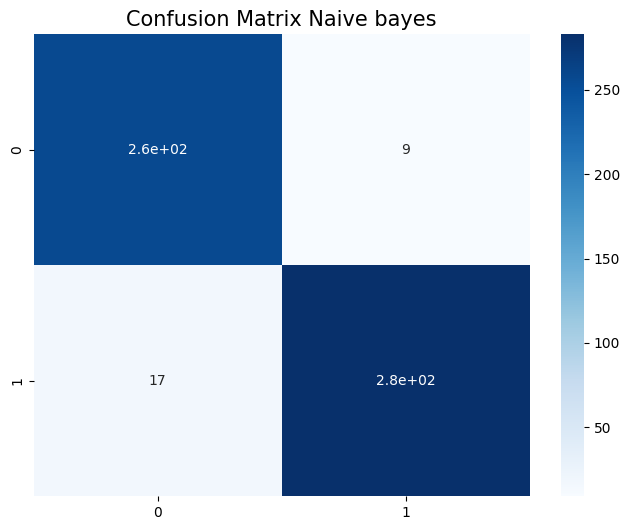

In [ ]:
#Decision Tree (With SMOTE & With Hyperaraeter Tuning)
X_train, X_test, y_train, y_test = train_test_split(X_train_sm, y_train_sm, test_size=0.20, random_state=10) #80% train : 20% test

dt_3 = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, max_depth=10, min_samples_split=10, min_samples_leaf=10, max_features=10)

dt_3.fit(X_train, y_train) #data training / data yg akan dipelajari algoritmanya
dt_3_predicted = dt_3.predict(X_test) #20% itulah yang akan di uji akurasi, presisi, dst.

dt_3_acc_score = accuracy_score(y_test, dt_3_predicted)
dt_3_prc_score = precision_score(y_test, dt_3_predicted)
dt_3_rec_score = recall_score(y_test, dt_3_predicted)
dt_3_f1_score = f1_score(y_test, dt_3_predicted)

print("Accuracy: %.2f%%" % (dt_3_acc_score*100))
print("Precision: %.2f%%" % (dt_3_prc_score*100))
print("Recall: %.2f%%" % (dt_3_rec_score*100))
print("F1 Score: %.2f%%" % (dt_3_f1_score*100))

#confusion matriks
cm = confusion_matrix(y_test, dt_3_predicted)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix Naive bayes', size=15)
sns.heatmap(cm, annot=True, cmap='Blues')

#confusion matriks versi teks
dt_3_conf_matrix = confusion_matrix(y_test, dt_3_predicted)
print(dt_3_conf_matrix)

In [ ]:
#Summary Performance masing-masing MODEL Algoritma
model_evaluation = pd.DataFrame({'Model': ['Naive Bayes','K-Nearest Neighbor','DT Not SMOTE','DT With SMOTE', 'RF With SMOTE', 'ET With SMOTE', 'XGB With SMOTE', 'LGB With SMOTE', 'LR With SMOTE', 'DT With SMOTE & Tuning'],
                                 'Accuracy':
                                 ["%.2f%%" % (nb_acc_score*100), "%.2f%%" % (knn_acc_score*100), "%.2f%%" % (dt_acc_score*100), "%.2f%%" % (dt_2_acc_score*100), "%.2f%%" % (rf_acc_score*100), "%.2f%%" % (et_acc_score*100), "%.2f%%" % (xgb_acc_score*100), "%.2f%%" % (lgb_acc_score*100),"%.2f%%" % (lr_acc_score*100),"%.2f%%" % (dt_3_acc_score*100)],
                                 'Precision':
                                 ["%.2f%%" % (nb_prc_score*100), "%.2f%%" % (knn_prc_score*100), "%.2f%%" % (dt_prc_score*100), "%.2f%%" % (dt_2_prc_score*100), "%.2f%%" % (rf_prc_score*100), "%.2f%%" % (et_prc_score*100), "%.2f%%" % (xgb_prc_score*100), "%.2f%%" % (lgb_prc_score*100), "%.2f%%" % (lr_prc_score*100), "%.2f%%" % (dt_3_prc_score*100)],
                                 'recall':
                                 ["%.2f%%" % (nb_rec_score*100), "%.2f%%" % (knn_rec_score*100), "%.2f%%" % (dt_rec_score*100), "%.2f%%" % (dt_2_rec_score*100), "%.2f%%" % (rf_rec_score*100), "%.2f%%" % (et_rec_score*100), "%.2f%%" % (xgb_rec_score*100), "%.2f%%" % (lgb_rec_score*100), "%.2f%%" % (lr_rec_score*100), "%.2f%%" % (dt_3_rec_score*100)],
                                 'F1 Score':
                                 ["%.2f%%" % (nb_f1_score*100), "%.2f%%" % (knn_f1_score*100), "%.2f%%" % (dt_f1_score*100), "%.2f%%" % (dt_2_f1_score*100), "%.2f%%" % (rf_f1_score*100), "%.2f%%" % (et_f1_score*100), "%.2f%%" % (xgb_f1_score*100), "%.2f%%" % (lgb_f1_score*100), "%.2f%%" % (lr_f1_score*100), "%.2f%%" % (dt_3_f1_score*100)]
                                 })
print(model_evaluation)

                    Model Accuracy Precision  recall F1 Score
0             Naive Bayes   84.31%    50.00%  70.59%   58.54%
1      K-Nearest Neighbor   85.54%    83.33%   9.80%   17.54%
2            DT Not SMOTE   93.54%    75.86%  86.27%   80.73%
3           DT With SMOTE   97.17%    97.97%  96.67%   97.32%
4           RF With SMOTE   84.45%    93.09%  76.33%   83.88%
5           ET With SMOTE   80.74%    85.24%  77.00%   80.91%
6          XGB With SMOTE   97.88%    98.65%  97.33%   97.99%
7          LGB With SMOTE   98.41%    99.32%  97.67%   98.49%
8           LR With SMOTE   84.98%    85.71%  86.00%   85.86%
9  DT With SMOTE & Tuning   95.41%    96.92%  94.33%   95.61%


#Prediction News dataset (Out of Sample)

In [ ]:
prediksi_nasabah = pd.read_csv("drive/MyDrive/training/prediksi_nasabah_database.csv")
prediksi_nasabah.head()

,ID_NPK,Nama_Nasabah,Nomor_Telepon,Usia,Alamat,Kelurahan_Desa,Kecamatan,Kab_Kota,Pekerjaan,Posisi_Perusahaan,...,Telp_Perusahaan,Penghasilan_Nasabah,Penghasilan_Pasangan,Pengeluaran,Nama_Pasangan_Penjamin,Usia_Pasangan_Penjamin,Telp_Pasangan_Penjamin,Hubungan,Status_Rumah,Verifikasi
0,1633,Beni Tito Anggoro,81346523585,49,Jl Blora 2 Gg Sido Rukun N0 27 22 00,Klandasan Ilir,Balikpapan Selatan,Balikpapan,Karyawan Swasta Non Bank,Pt Mitra Tri Daya Utama,...,81346214156,7100000,2900000,6000000,Sugiyono,25,82250559681,Keponakan,Milik Sendiri Sudah Lunas,Survey
1,1634,Benny Robiantoro,85399151827,39,Jl A Yani Gg Swakarya Rt 021,Muara Jawa Pesisir,Muara Jawa,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,...,85332737550,8000000,2000000,6000000,Rika Herliana,21,82251178666,Keponakan,Kontrak,Survey
2,1635,Berto M S Adsio Aritonang,81329297779,70,Bpp Regency Blok Ce T No 05 42 00,Sepinggan,Balikpapan Selatan,Balikpapan,Pedagang,Pedagang Pakaian,...,85392043286,8100000,3000000,6660000,Sugiyo,26,82251178666,Keponakan,Milik Sendiri Sudah Lunas,Survey
3,1636,Bervin Ornella,85349940792,60,Jl Husni Thamrin Rt 008,Muara Kembang,Muara Jawa,Kutai Kartanegara,Karyawan PNS/BUMN/BUMD,Pns Honorer,...,81254731976,3000000,1600000,2760000,Yudha Iriantho S,28,8125395120,Saudara,Kontrak,Survey
4,1637,Beti Nurbaeti,85389782530,54,Ambarawang Darat Rt 005,Ambarawang Darat,Samboja,Kutai Kartanegara,Karyawan Swasta Non Bank,Operator /Buruh/Tenlap,...,85387764849,3200000,1500000,2820000,Tri Rahmawan,25,82352116928,Keponakan,Milik Orang Tua,Deskcall


In [ ]:
#menambahkan kolom baru sisa penghasilan
prediksi_nasabah['Sisa_Penghasilan'] = (prediksi_nasabah['Penghasilan_Nasabah']-prediksi_nasabah['Pengeluaran'])

In [ ]:
#memilih variabel yang akan digunakan untuk membuat model Predictions Machine Learning.
data_prediksi = prediksi_nasabah[['ID_NPK','Usia','Pekerjaan','Kecamatan','Lama_Kerja_Bisnis','Penghasilan_Nasabah','Pengeluaran','Sisa_Penghasilan','Status_Rumah','Verifikasi']]
data_prediksi.shape

(50, 10)

In [ ]:
data_prediksi.isnull().sum()

,0
ID_NPK,0
Usia,0
Pekerjaan,0
Kecamatan,0
Lama_Kerja_Bisnis,0
Penghasilan_Nasabah,0
Pengeluaran,0
Sisa_Penghasilan,0
Status_Rumah,0
Verifikasi,0


In [ ]:
#Fungsi untuk membuat kelompok Penghasilan Nasabah
def Penghasilan_Nasabah(dataframe):
    dataframe.loc[dataframe['Penghasilan_Nasabah'] <= 4200000, 'Penghasilan_Nasabah'] = 1
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 4200000) & (dataframe['Penghasilan_Nasabah'] <= 5800000), 'Penghasilan_Nasabah'] = 2
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 5800000) & (dataframe['Penghasilan_Nasabah'] <= 6600000), 'Penghasilan_Nasabah'] = 3
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 6600000) & (dataframe['Penghasilan_Nasabah'] <= 9200000), 'Penghasilan_Nasabah'] = 4
    dataframe.loc[(dataframe['Penghasilan_Nasabah'] > 9200000) & (dataframe['Penghasilan_Nasabah'] <= 10500000), 'Penghasilan_Nasabah'] = 5

    return dataframe

Penghasilan_Nasabah(data_prediksi);

In [ ]:
#Fungsi untuk membuat kelompok Penghasiln Nasabah
def Pengeluaran(dataframe):
    dataframe.loc[dataframe['Pengeluaran'] <= 4020000, 'Pengeluaran'] = 1
    dataframe.loc[(dataframe['Pengeluaran'] > 4020000) & (dataframe['Pengeluaran'] <= 980000), 'Pengeluaran'] = 2
    dataframe.loc[(dataframe['Pengeluaran'] > 980000) & (dataframe['Pengeluaran'] <= 5400000), 'Pengeluaran'] = 3
    dataframe.loc[(dataframe['Pengeluaran'] > 5400000) & (dataframe['Pengeluaran'] <= 7080000), 'Pengeluaran'] = 4
    dataframe.loc[(dataframe['Pengeluaran'] > 7080000) & (dataframe['Pengeluaran'] <= 8340000), 'Pengeluaran'] = 5

    return dataframe

Pengeluaran(data_prediksi);

In [ ]:
#Fungsi untuk membuat kelompok lama Kerja Bisnis
def Lama_Kerja_Bisnis(dataframe):
    dataframe.loc[dataframe['Lama_Kerja_Bisnis'] <= 8, 'Lama_Kerja_Bisnis'] = 1
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 8) & (dataframe['Lama_Kerja_Bisnis'] <= 9), 'Lama_Kerja_Bisnis'] = 2
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 9) & (dataframe['Lama_Kerja_Bisnis'] <= 10), 'Lama_Kerja_Bisnis'] = 3
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 10) & (dataframe['Lama_Kerja_Bisnis'] <= 12), 'Lama_Kerja_Bisnis'] = 4
    dataframe.loc[(dataframe['Lama_Kerja_Bisnis'] > 12) & (dataframe['Lama_Kerja_Bisnis'] <= 15), 'Lama_Kerja_Bisnis'] = 5

    return dataframe

Lama_Kerja_Bisnis(data_prediksi);

In [ ]:
#Fungsi untuk membuat kelompok lama Kerja Bisnis
def Sisa_Penghasilan(dataframe):
    dataframe.loc[dataframe['Sisa_Penghasilan'] <= 148000, 'Sisa_Penghasilan'] = 1
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 148000) & (dataframe['Sisa_Penghasilan'] <= 860000), 'Sisa_Penghasilan'] = 2
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 860000) & (dataframe['Sisa_Penghasilan'] <= 1140000), 'Sisa_Penghasilan'] = 3
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 1140000) & (dataframe['Sisa_Penghasilan'] <= 2180000), 'Sisa_Penghasilan'] = 4
    dataframe.loc[(dataframe['Sisa_Penghasilan'] > 2180000) & (dataframe['Sisa_Penghasilan'] <= 3300000), 'Sisa_Penghasilan'] = 5

    return dataframe

Sisa_Penghasilan(data_prediksi);

In [ ]:
data_prediksi.head()

,ID_NPK,Usia,Pekerjaan,Kecamatan,Lama_Kerja_Bisnis,Penghasilan_Nasabah,Pengeluaran,Sisa_Penghasilan,Status_Rumah,Verifikasi
0,1633,49,Karyawan Swasta Non Bank,Balikpapan Selatan,4,4,4,3,Milik Sendiri Sudah Lunas,Survey
1,1634,39,Karyawan Swasta Non Bank,Muara Jawa,2,4,4,4,Kontrak,Survey
2,1635,70,Pedagang,Balikpapan Selatan,3,4,4,4,Milik Sendiri Sudah Lunas,Survey
3,1636,60,Karyawan PNS/BUMN/BUMD,Muara Jawa,4,1,1,2,Kontrak,Survey
4,1637,54,Karyawan Swasta Non Bank,Samboja,5,1,1,2,Milik Orang Tua,Deskcall


In [ ]:
label_data = data_prediksi.copy()
label_encoder = LabelEncoder()

for col in label_data[['Pekerjaan','Kecamatan','Status_Rumah','Verifikasi']]:
  label_data[col] = label_encoder.fit_transform(label_data[col])

data_prediksi=label_data

In [ ]:
data_prediksi.head()

,ID_NPK,Usia,Pekerjaan,Kecamatan,Lama_Kerja_Bisnis,Penghasilan_Nasabah,Pengeluaran,Sisa_Penghasilan,Status_Rumah,Verifikasi
0,1633,49,2,1,4,4,4,3,4,2
1,1634,39,2,5,2,4,4,4,0,2
2,1635,70,3,1,3,4,4,4,4,2
3,1636,60,1,5,4,1,1,2,0,2
4,1637,54,2,6,5,1,1,2,1,0


In [ ]:
#membuat variabel untuk menampung data masin-masing variabel
Id = prediksi_nasabah['ID_NPK']
nama = prediksi_nasabah['Nama_Nasabah']
usia = prediksi_nasabah['Usia']
pekerjaan = prediksi_nasabah['Pekerjaan']
kecamatan = prediksi_nasabah['Kecamatan']
lama_kerja_bisnis = prediksi_nasabah['Lama_Kerja_Bisnis']
penghasilan_nasabah = prediksi_nasabah['Penghasilan_Nasabah']
pengeluaran = prediksi_nasabah['Pengeluaran']
sisa_penghasilan = prediksi_nasabah['Sisa_Penghasilan']
status_rumah = prediksi_nasabah['Status_Rumah']
verifikasi = prediksi_nasabah['Verifikasi']

In [ ]:
preds = pd.Series(lgb.predict(data_prediksi.drop('ID_NPK', axis=1)), name = 'Prediksi')

result = pd.DataFrame()
result['ID_NASABAH'] = Id
result['Nama_nasabah'] = nama
result['Usia'] = usia
result['Pekerjaan'] = pekerjaan
result['Kecamatan'] = kecamatan
result['Lama_Kerja_Bisnis'] = lama_kerja_bisnis
result['Penghasilan_Nasabah'] = penghasilan_nasabah
result['Pengeluaran'] = pengeluaran
result['Sisa_Penghasilan'] = sisa_penghasilan
result['Status_Rumah'] = status_rumah
result['Verifikasi'] = verifikasi

result['Prediksi'] = preds
mapping = {0:'Approve', 1:'Reject'}
result = result.replace({'Prediksi':mapping})

result.to_csv("drive/MyDrive/training/Hasil_Prediksi_Nasabah.csv", index=False)

In [ ]:
result.head()

,ID_NASABAH,Nama_nasabah,Usia,Pekerjaan,Kecamatan,Lama_Kerja_Bisnis,Penghasilan_Nasabah,Pengeluaran,Sisa_Penghasilan,Status_Rumah,Verifikasi,Prediksi
0,1633,Beni Tito Anggoro,49,Karyawan Swasta Non Bank,Balikpapan Selatan,11,7100000,6000000,1100000,Milik Sendiri Sudah Lunas,Survey,Approve
1,1634,Benny Robiantoro,39,Karyawan Swasta Non Bank,Muara Jawa,9,8000000,6000000,2000000,Kontrak,Survey,Reject
2,1635,Berto M S Adsio Aritonang,70,Pedagang,Balikpapan Selatan,10,8100000,6660000,1440000,Milik Sendiri Sudah Lunas,Survey,Approve
3,1636,Bervin Ornella,60,Karyawan PNS/BUMN/BUMD,Muara Jawa,11,3000000,2760000,240000,Kontrak,Survey,Reject
4,1637,Beti Nurbaeti,54,Karyawan Swasta Non Bank,Samboja,14,3200000,2820000,380000,Milik Orang Tua,Deskcall,Reject


In [ ]:
result[result['Prediksi'].isin(['Reject'])]

,ID_NASABAH,Nama_nasabah,Usia,Pekerjaan,Kecamatan,Lama_Kerja_Bisnis,Penghasilan_Nasabah,Pengeluaran,Sisa_Penghasilan,Status_Rumah,Verifikasi,Prediksi
1,1634,Benny Robiantoro,39,Karyawan Swasta Non Bank,Muara Jawa,9,8000000,6000000,2000000,Kontrak,Survey,Reject
3,1636,Bervin Ornella,60,Karyawan PNS/BUMN/BUMD,Muara Jawa,11,3000000,2760000,240000,Kontrak,Survey,Reject
4,1637,Beti Nurbaeti,54,Karyawan Swasta Non Bank,Samboja,14,3200000,2820000,380000,Milik Orang Tua,Deskcall,Reject
6,1639,Hadi Wibowo,59,Karyawan Swasta Non Bank,Balikpapan Tengah,8,8200000,6420000,1780000,Milik Sendiri Sudah Lunas,Survey,Reject
9,1642,Meyflin Gabriel Lintang,67,Professional,Muara Jawa,12,4700000,4560000,140000,Kontrak,Member,Reject
10,1643,Michael Leonard Sendouw,78,Karyawan Swasta Non Bank,Balikpapan Timur,11,8600000,6240000,2360000,Kontrak,Survey,Reject
13,1646,Trisnawati,49,Karyawan Swasta Non Bank,Balikpapan Timur,14,3500000,3120000,380000,Kontrak,Survey,Reject
14,1647,Try Haryono,34,Professional,Balikpapan Timur,8,5300000,4200000,1100000,Milik Orang Tua,Survey,Reject
16,1649,Tuminah,54,Karyawan PNS/BUMN/BUMD,Balikpapan Selatan,10,7500000,6420000,1080000,Kontrak,Survey,Reject
17,1650,Turini,34,Karyawan PNS/BUMN/BUMD,Balikpapan Barat,12,2900000,2760000,140000,Milik Sendiri Belum Lunas,Survey,Reject


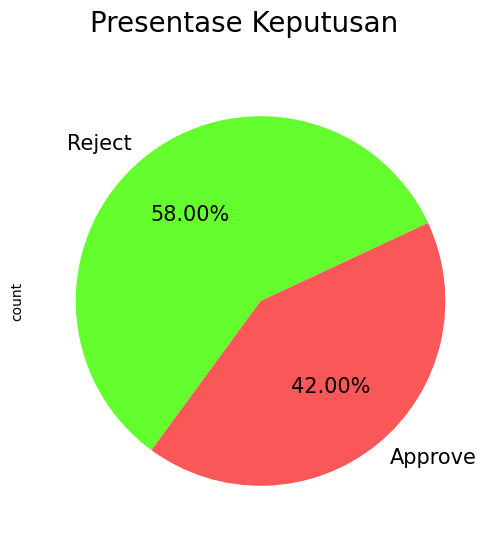

In [ ]:
#Pie Chart
color = ["#64FE2E","#FA5858"]
labels = "Reject","Approve"
plt.suptitle("Presentase Keputusan", fontsize=20)
result["Prediksi"].value_counts().plot.pie(autopct='%1.2f%%',
                                           colors=color,
                                           fontsize=15,
                                           labels=labels,
                                           startangle=25)
plt.show()